# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
import matplotlib

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

#https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/

In [2]:
sat_scores_csv = 'sat_scores.csv'
sat_scores = pd.read_csv(sat_scores_csv)
sat_scores.head(8)
sat_scores.describe()
sat_scores.head(8)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506


#option 1 to make dataframe to list
sat_scores_csv = 'sat_scores.csv'
sat_scores_dict = {'State':[],'Rate':[],'Verbal':[],'Math':[]}

with open(sat_scores_csv) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        sat_scores_dict['State'].append(row['State'])
        sat_scores_dict['Rate'].append(row['Rate'])
        sat_scores_dict['Verbal'].append(row['Verbal'])
        sat_scores_dict['Math'].append(row['Math'])

print(sat_scores_dict)

In [3]:
#option 2
#convert list to make dataframe to list
rate = sat_scores['Rate'].tolist()
verbal = sat_scores['Verbal'].tolist()
math = sat_scores['Math'].tolist()
state = sat_scores['State'].tolist()

#to dictionary
sat_score_dictionary={}
sat_score_dictionary ['State']=state
sat_score_dictionary ['Rate']=rate
sat_score_dictionary ['Verbal']=verbal
sat_score_dictionary ['Math']=math
#dictionary of list
print(sat_score_dictionary)


{'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551, 514], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
#sat_scores.dtypes
#State     object
#Rate       int64
#Verbal     int64
#Math       int64
#dtype: object

#converting sat_score_dictionary to dataframes 
sat_score_dictionary= pd.DataFrame(sat_scores)
sat_score_dictionary.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
sat_scores.head(10)
#sat_scores.describe()
sat_scores.reset_index(drop=True)
sat_scores

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [6]:
sat_scores_dictionary = {}
sat_scores_dictionary['variable name'] =sat_scores.columns
sat_scores_dictionary['type'] =sat_scores.dtypes
sat_scores_dictionary['description'] =['state','Rate','Verbal score','Math score']
sat_scores_dictionary['shape'] = sat_scores.shape

print(sat_scores_dictionary )

{'type': State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object, 'shape': (52, 4), 'variable name': Index([u'State', u'Rate', u'Verbal', u'Math'], dtype='object'), 'description': ['state', 'Rate', 'Verbal score', 'Math score']}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

/Users/laurenciatitan/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


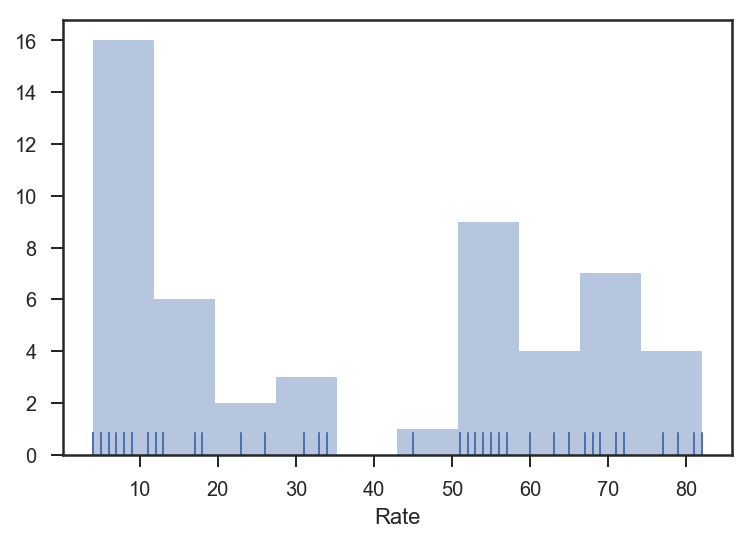

In [38]:
sns.distplot(sat_scores['Rate'],bins =10, kde=False, rug=True)# rug small line

# the plot describing 
# there 16 state have the frequency of rate between 4 to around 11.8
# there 4 state have the frequency of rate between 74 to 84
# there are 0 state have the frequesncy of rate between 35 to 42

#using 10 part of bin
#max - min/ 10= 7.8 width
#start from 4, 4+7.8 = 11.8

/Users/laurenciatitan/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


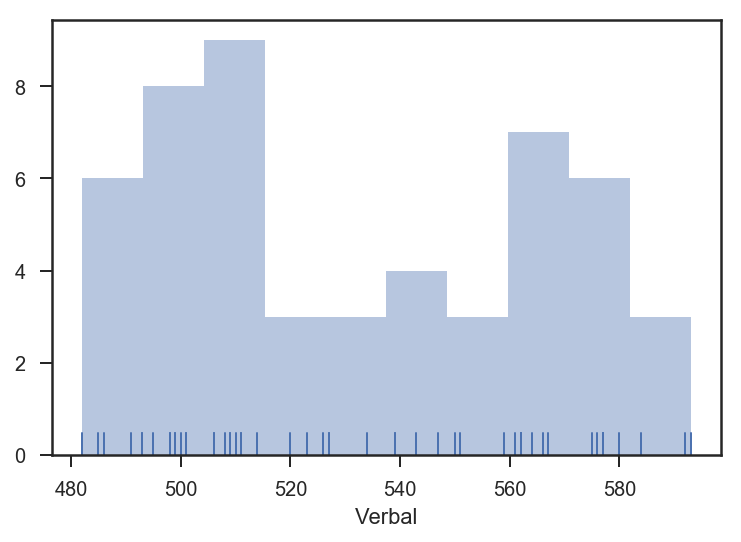

In [39]:
sns.distplot(sat_scores['Verbal'], bins =10,kde=False, rug=True)

/Users/laurenciatitan/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


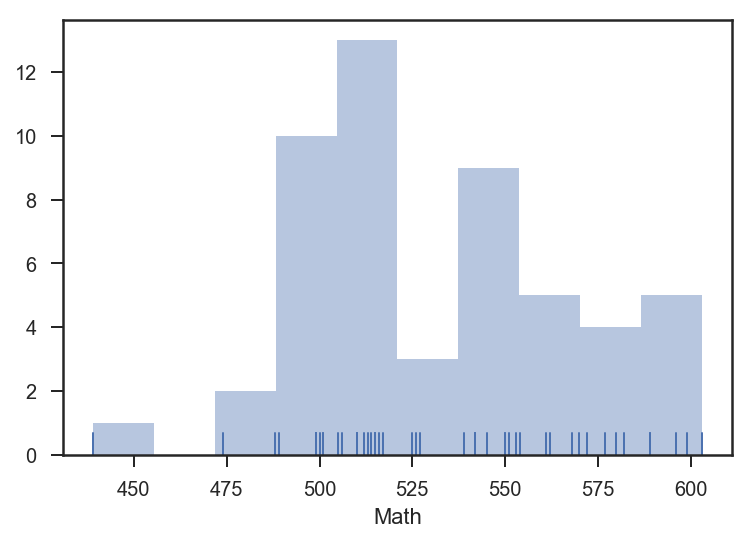

In [40]:
sns.distplot(sat_scores['Math'], bins =10,kde=False, rug=True)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

## Finding:

-positive correlation: 
math vs verbal : score for math and verbal grow together
verbal and math : score for verbal and math grow together

-positive correlation conclusion: 
student who get lower in verbal have the tendency to get lower in math andstudent who get higher in verbal have the tendency to get higherin math

-negative correlation:
rate and math : lower rate for student to get high score in math
rate and verbal : lower rate for student to get highe score in verbal
verbal and rate : lower verbal score showing higher rate ,high verbal scare showing low rate
math and rate : medium math score showiung higher rate compare to high math score showing lower rate



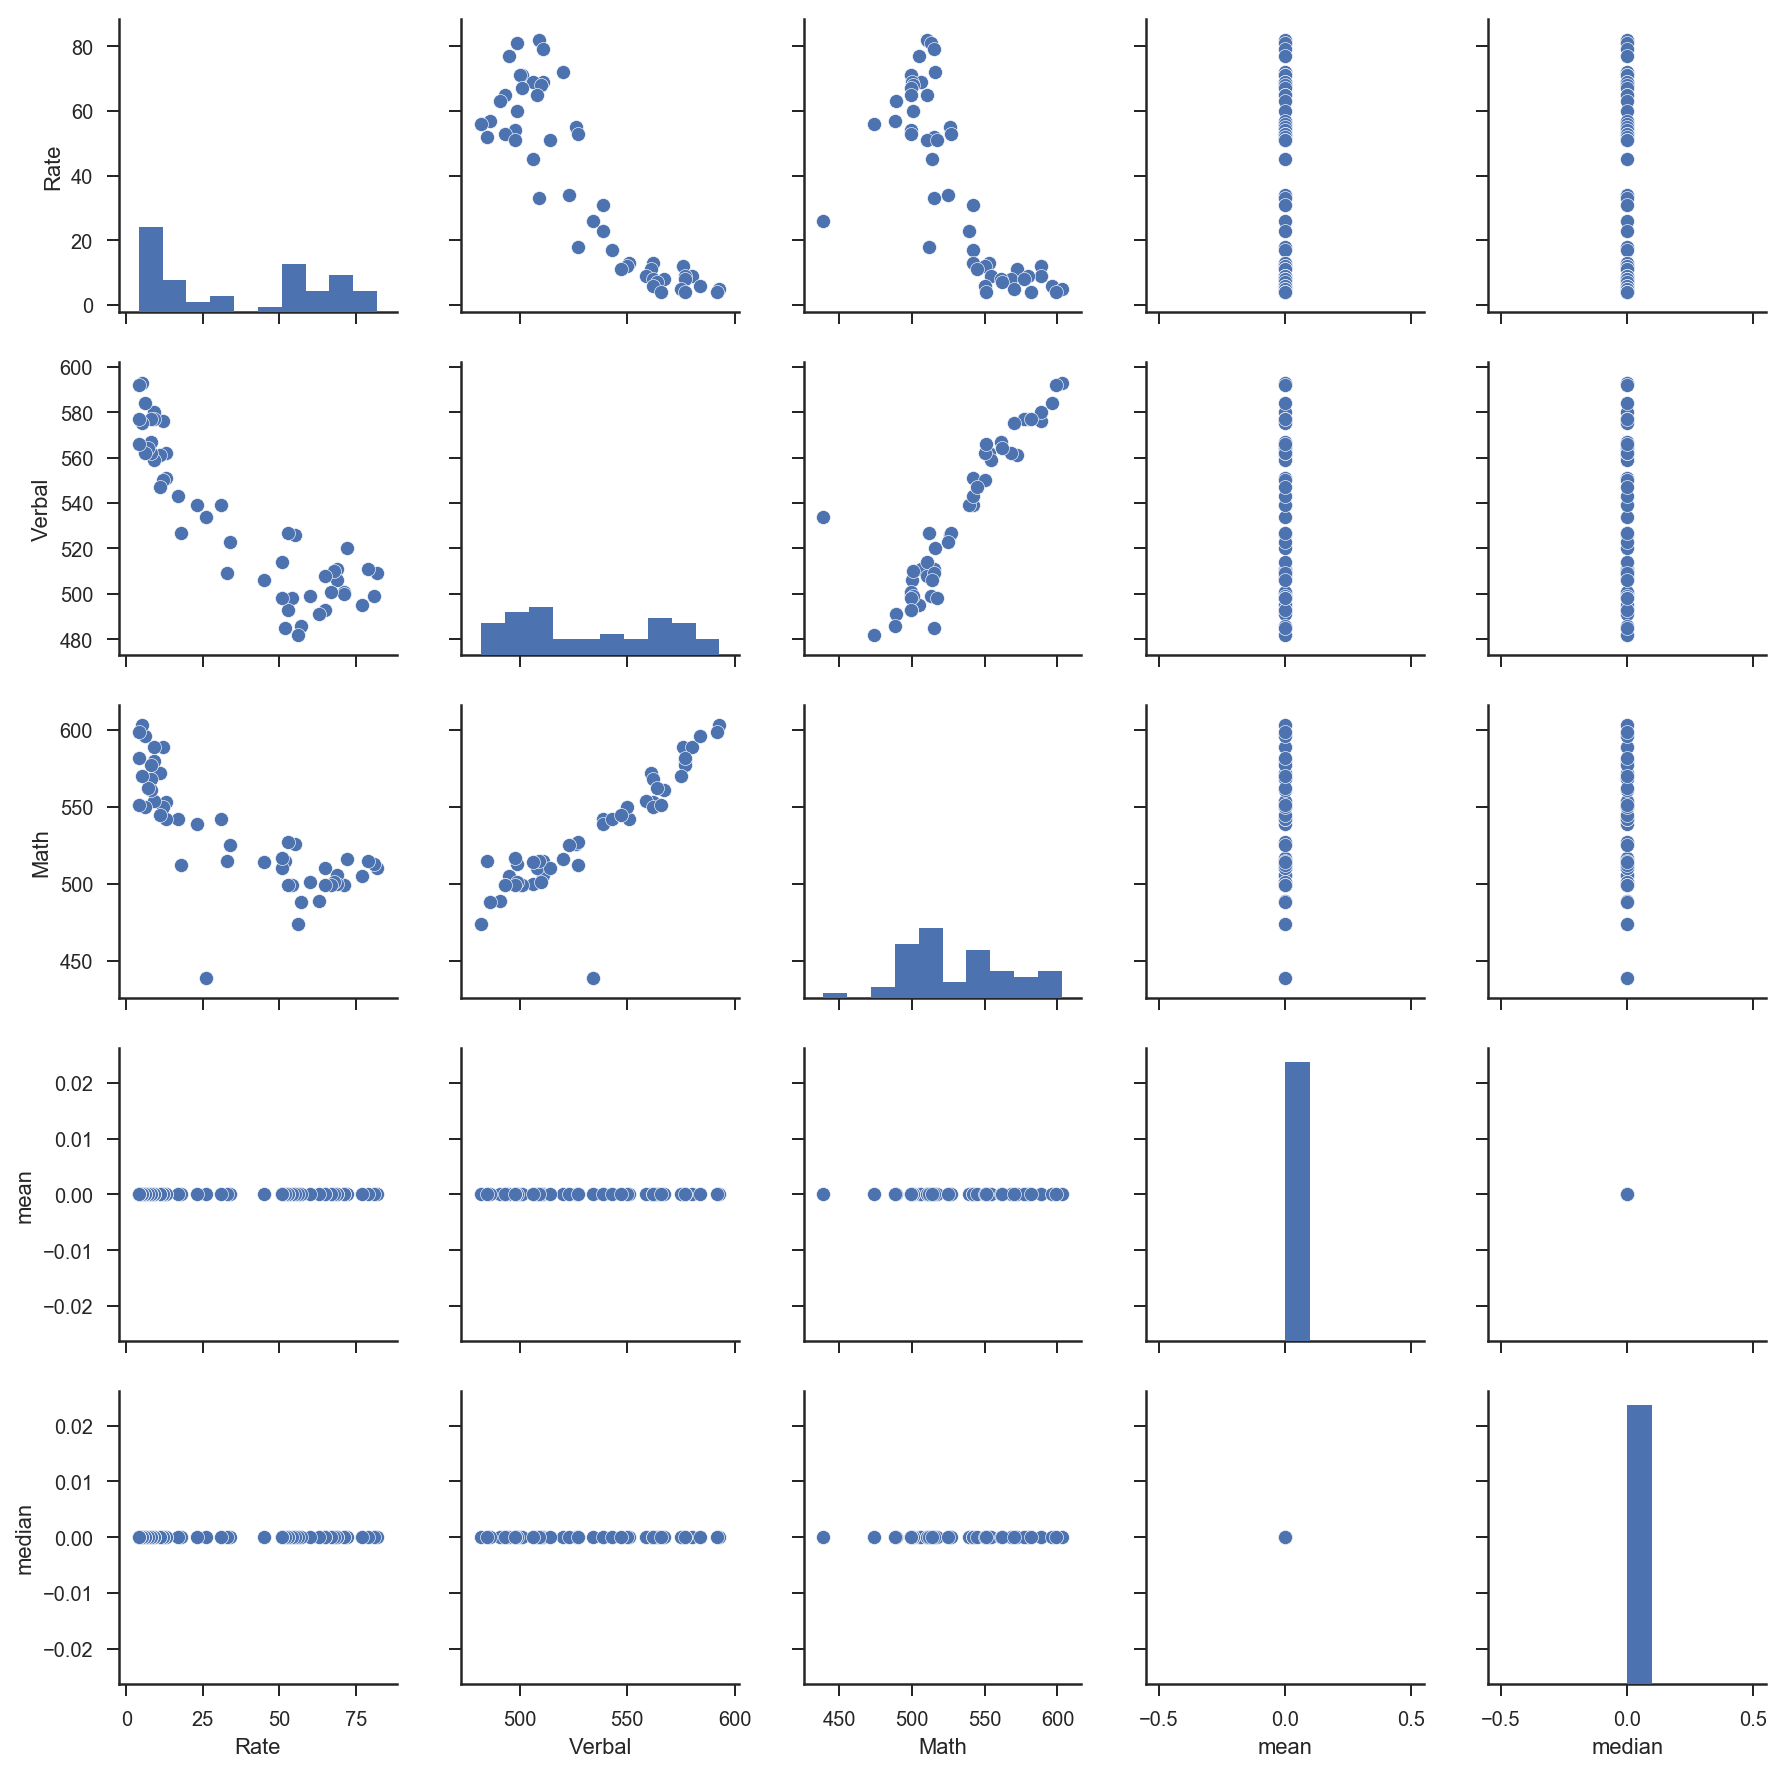

In [41]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
sns.pairplot(sat_scores)

#positive correlation between verbal and math, lower verbal = lower math
#lower math = lower verbal visa versa

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

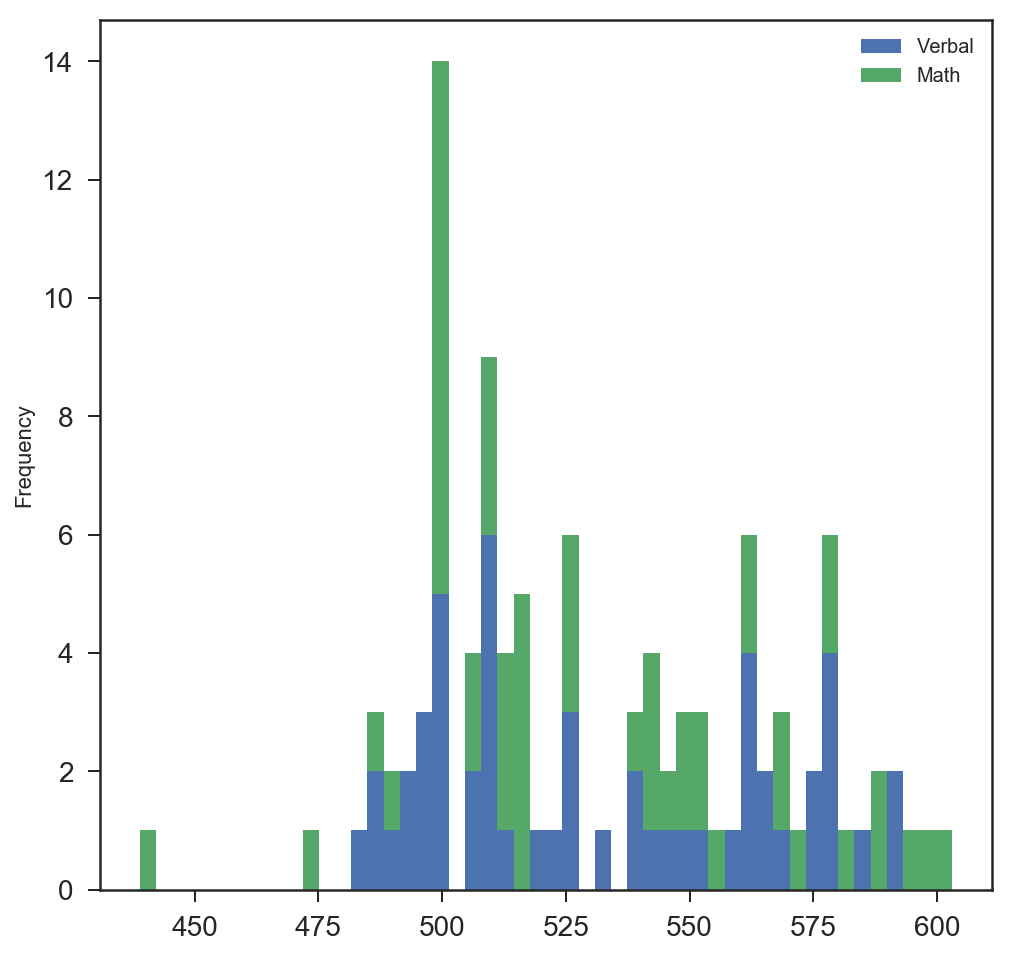

In [42]:
#chosing waht you want to plot
#verbal_vs_math= pd.DataFrame(sat_scores,columns=['Verbal','Math'])

#fig size readjust the size of box
#verbal_vs_math.plot.hist(stacked=True, bins=50,figsize=(8,8))
# give title

#option two
sat_scores.loc[:,'Verbal':'Math'].plot.hist(stacked=True, bins=50,figsize=(8,8),fontsize =14)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

In [43]:
print('What are the benefits of using a boxplot as compared to a scatterplot or a histogram?')
print('we can tell more about the data which are see the spread of the data, compare 25%, 50%, 75%, median')

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?
we can tell more about the data which are see the spread of the data, compare 25%, 50%, 75%, median


Rate       37.153846
Verbal    532.019231
Math      531.500000
mean        0.000000
median      0.000000
dtype: float64

Rate       33.5
Verbal    526.5
Math      521.0
mean        0.0
median      0.0
dtype: float64

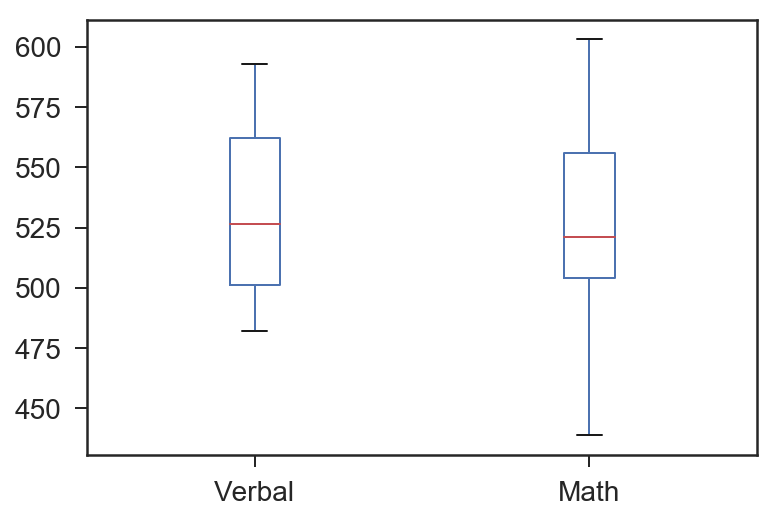

In [44]:
sat_scores.loc[:,'Verbal':'Math'].plot.box( fontsize =14) #figsize=(8,8)
display(sat_scores.mean())
display(sat_scores.median())

#math data more widely spread compare than verbal

#there is less aggrement between student scores on math than there is on verbal

#math have lower 25% and higher 75% than verbal
 
#however math median lower than verbal

#student seem more in lower median score in math and verbal

#box show where the data concentrated

#low score and high score causing the data to strech

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


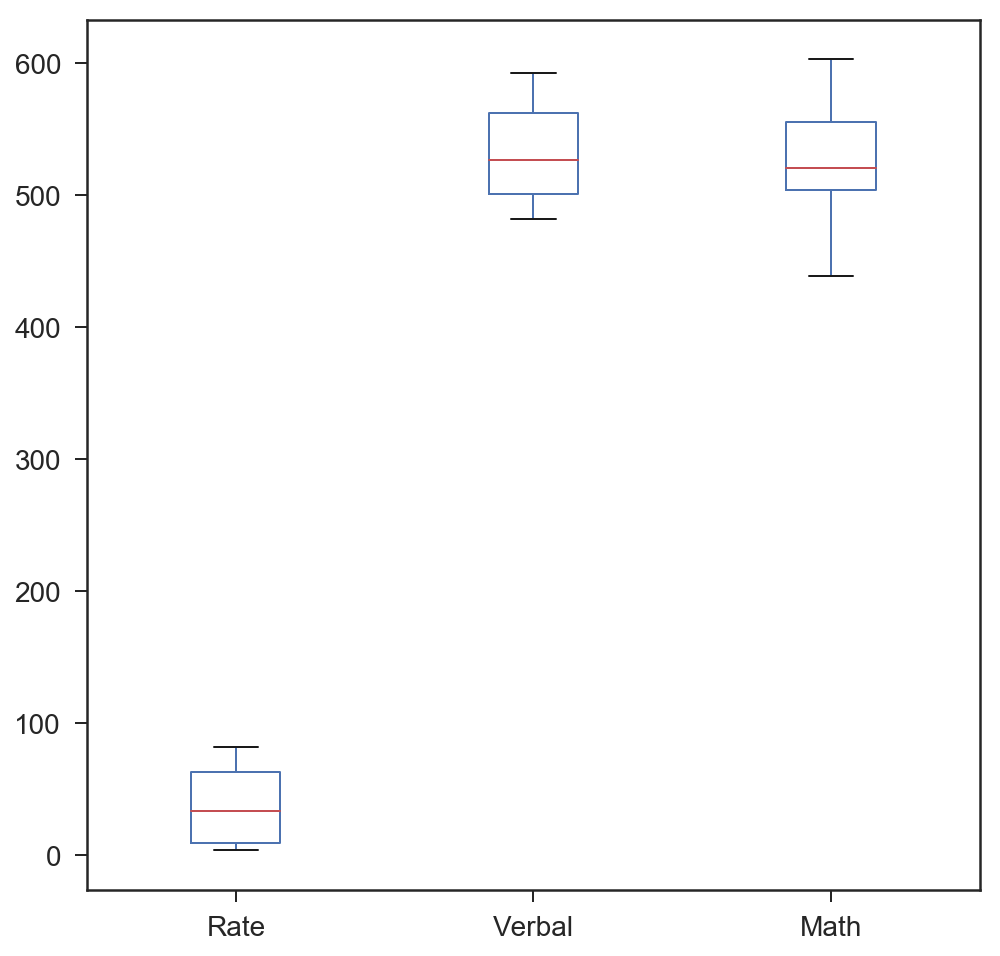

In [45]:
#option1
sat_scores.loc[:,'Rate':'Math'].plot.box(figsize=(8,8),fontsize =14)
#means = [np.mean(x) for x in sat_scores]
#pylab.scatter(['Rate', 'Verbal', 'Math'], means)

,Rate,Verbal,Math,mean,median
count,52.000000,52.000000,52.000000,52.0,52.0
mean,37.153846,532.019231,531.500000,0.0,0.0
std,27.301788,33.236225,36.014975,0.0,0.0
min,4.000000,482.000000,439.000000,0.0,0.0
25%,9.000000,501.000000,504.000000,0.0,0.0
50%,33.500000,526.500000,521.000000,0.0,0.0
75%,63.500000,562.000000,555.750000,0.0,0.0
max,82.000000,593.000000,603.000000,0.0,0.0


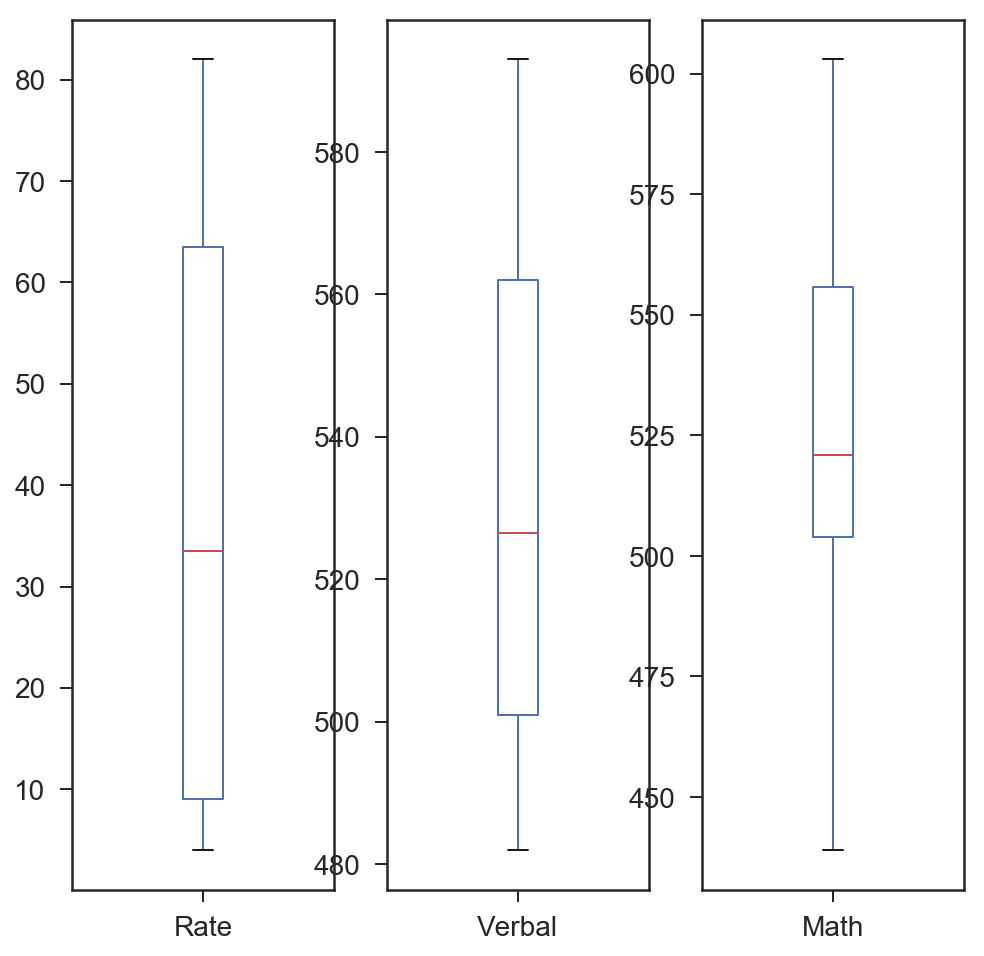

In [46]:
#option 2
sat_scores.loc[:,'Rate':'Math'].plot.box(figsize=(8,8),fontsize =14, subplots=True)
sat_scores.describe()


(37.15384615384615, 27.037996494523586)


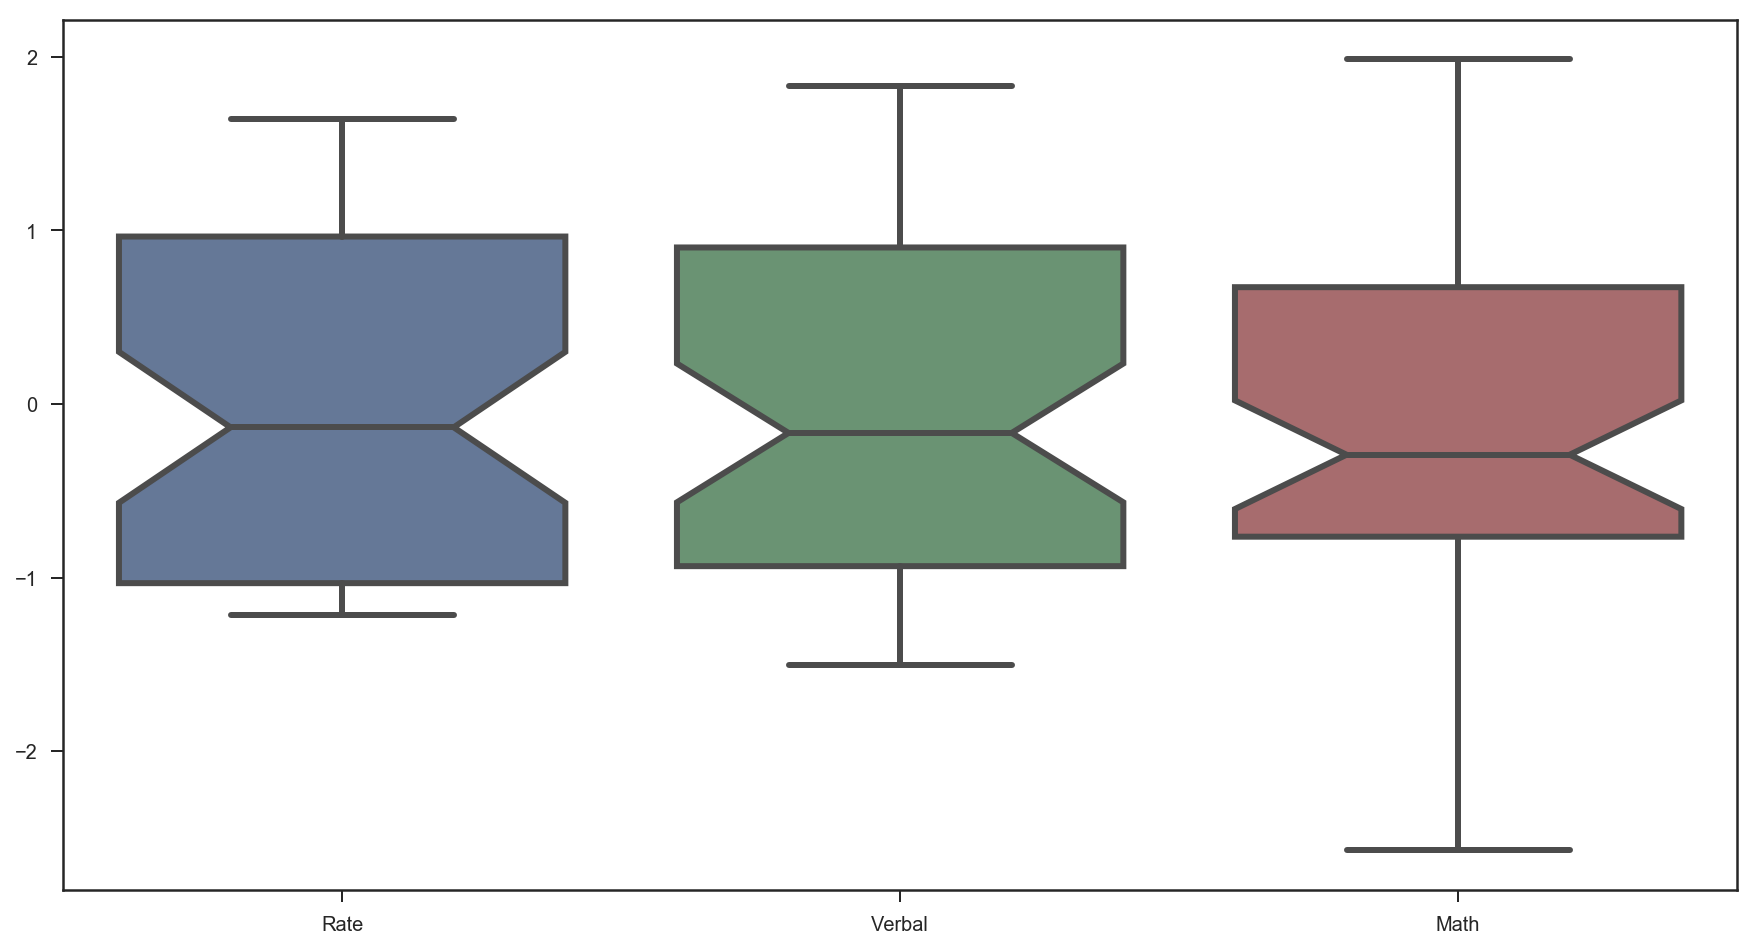

In [47]:
#Standardize percolumn
Rate = sat_scores.Rate.values
Rate_mean = np.mean(Rate)
Rate_std = np.std(Rate)
print(Rate_mean, Rate_std)

#perdata
#sat_scores_stand = (sat_scores - sat_scores.mean()) / sat_scores.std()
sat_scores_stand=sat_scores[['Rate','Verbal','Math']]
sat_scores_st = (sat_scores_stand - sat_scores_stand.mean()) / sat_scores_stand.std()


#sat_scores_st.plot.box(figsize=(8,8),fontsize =14, subplots=False )
fig = plt.figure(figsize=(15, 8))
ax = fig.gca()
sns.boxplot(data=sat_scores_st,orient='v', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [48]:
#drop column
#new_sat_scores =sat_scores.drop(['index','abovemean'], axis =1)

#check all the value
print(sat_scores.State.unique())
print(sat_scores.Rate.unique())
print(sat_scores.Verbal.unique())
print(sat_scores.Math.unique())

#check is there is null
print(sat_scores.isnull().sum())

['CT' 'NJ' 'MA' 'NY' 'NH' 'RI' 'PA' 'VT' 'ME' 'VA' 'DE' 'MD' 'NC' 'GA'
 'IN' 'SC' 'DC' 'OR' 'FL' 'WA' 'TX' 'HI' 'AK' 'CA' 'AZ' 'NV' 'CO' 'OH'
 'MT' 'WV' 'ID' 'TN' 'NM' 'IL' 'KY' 'WY' 'MI' 'MN' 'KS' 'AL' 'NE' 'OK'
 'MO' 'LA' 'WI' 'AR' 'UT' 'IA' 'SD' 'ND' 'MS' 'All']
[82 81 79 77 72 71 69 68 67 65 63 60 57 56 55 54 53 52 51 34 33 31 26 23
 18 17 13 12 11  9  8  7  6  5  4 45]
[509 499 511 495 520 501 500 506 510 508 493 491 486 482 526 498 527 485
 514 523 539 534 543 562 551 576 550 547 561 580 577 559 567 564 584 575
 593 592 566]
[510 513 515 505 516 499 506 500 501 489 488 474 526 527 517 525 542 439
 539 512 553 589 550 545 572 580 554 568 561 577 562 596 570 603 582 599
 551 514]
State     0
Rate      0
Verbal    0
Math      0
mean      0
median    0
dtype: int64


In [49]:
State_Verbal =sat_scores.loc[:,['State', 'Math']]
State_Verbal

,State,Math
0,CT,510
1,NJ,513
2,MA,515
3,NY,505
4,NH,516
5,RI,499
6,PA,499
7,VT,506
8,ME,500
9,VA,501


In [64]:
#get location
State_Verbal =sat_scores.loc[:,['State', 'Math']]

#create columns
sat_scores['mean']=0
sat_scores['median']=0

#above 1, below 0
#mean data
mean = np.mean(State_Verbal['Math']) #532.0192307692307
sat_scores.loc[sat_scores['Math'] > mean, 'mean'] = 1
sat_scores.loc[sat_scores['Math'] < mean, 'mean'] = 0
#median data
median = np.median(State_Verbal['Math'])
sat_scores.loc[sat_scores['Math'] > median, 'median'] = 1
sat_scores.loc[sat_scores['Math'] < median, 'median'] = 0
#do this alternative df['elderly'] = np.where(df['age']>=50, 'yes', 'no')
sat_scores['Math'].isnull().sum().sum()

#count number
sat_scores['Math'].value_counts()

#sorting from above to below
sat_scores.sort_values('mean', ascending = False)

#total number of all

#M=
display(sat_scores['mean'].value_counts()[1])
display(sat_scores['median'].value_counts()[1])

23

26

In [66]:
mean_percentage =sat_scores.groupby('mean').size()/len(sat_scores['mean'])

#mean
print('below mean',mean_percentage[0],'above mean', mean_percentage[1])
print('How many states are above the mean? What does this tell you about the distribution of Verbal scores?')
print (sat_scores['mean'].value_counts()[1],'state above the mean, about avarage candidate fall to average score')
print (mean_percentage)
print ('')

#median
median_percentage=sat_scores.groupby('median').size()/len(sat_scores['median'])
print(sat_scores['median'].value_counts()[1], 'state of median')
print (median_percentage)


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

#How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

('below mean', 0.5576923076923077, 'above mean', 0.4423076923076923)
How many states are above the mean? What does this tell you about the distribution of Verbal scores?
(23, 'state above the mean, about avarage candidate fall to average score')
mean
0    0.557692
1    0.442308
dtype: float64

(26, 'state of median')
median
0    0.5
1    0.5
dtype: float64


In [ ]:
How does this compare to the list of states greater than the mean of `Verbal` scores? Why

In [ ]:
How does this compare to the list of states greater than the mean of `Verbal` scores? Why

In [53]:
How does this compare to the list of states greater than the mean of `Verbal` scores? Why

SyntaxError: invalid syntax (<ipython-input-53-25a46a506bb2>, line 1)

In [ ]:
#def skeweness
def skewness(lis):
    if np.mean(lis) > np.median(lis):
        print("The data is skewed right")
    elif np.mean(lis) < np.median(lis):
        print("The data is skewed left")
    else:
        print("The data is normally distributed")

#print('mean')
skewness(sat_scores['Verbal'])
#print('median')
skewness(sat_scores['Math'])

print('')
print('median higher than mean ,skewed to the left')
print('mean higher than higher ,skewed to the right')

print('if the mean is lower than median, most student score above average, or >46%, the lower socre is really low bring down the score, despite with student with higher score')

#sns.lmplot(x = 'Math',y ='mean', data = sat_scores, fit_reg=False)


In [ ]:
# show median and mean ==1
#filterinfDataframe = sat_scores[(sat_scores['median'] ==1) | (sat_scores['mean'] == 1 )]

#use this to get mean and median ==1
for index, row in sat_scores.iterrows():
    if row["mean"]==1 | row["median"] ==1:
        print ('state',row["State"],'verbal',row["Verbal"],'math', row['Math'])

In [ ]:
display(sat_scores.sort_values('median', ascending = False).head(26))
display(sat_scores.sort_values('mean', ascending = False).head(24))

In [ ]:
#https://www.reddit.com/r/learnpython/comments/5wnypp/how_to_do_an_if_case_statement_in_pandas/
#create new data after comparing

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [ ]:
sat_scores['verbal_math_difference']= sat_scores['Verbal']-sat_scores['Math']
sat_scores

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [ ]:
#1 Verbal is greater than Math
verbalvsmath =sat_scores.sort_values ('verbal_math_difference', ascending=False)
#rank 
verbalvsmath['verbal vs math rank']=verbalvsmath['verbal_math_difference'].rank(ascending=False)
verbalvsmath.head(10)

mathvsverbal=sat_scores.sort_values ('verbal_math_difference', ascending=True)
mathvsverbal['math vs verbal rank']=mathvsverbal['verbal_math_difference'].rank(ascending=1)

#mathvsverbal
sat_scores['verbal vs math rank']=verbalvsmath['verbal_math_difference'].rank(ascending=0)

sat_scores['math vs verbal rank']=mathvsverbal['verbal_math_difference'].rank(ascending=1)
sat_scores

v=verbalvsmath[['State','Verbal','Math','verbal vs math rank']]
m=mathvsverbal[['State','Verbal','Math', 'math vs verbal rank']]
v.head(4)
#sat_scores.sort_values ('verbal_math_difference', ascending=True)


In [ ]:
m.head(4)

#option 2
sat_scores_df2=sat_scores_df1.copy()
sat_scores_df2.sort_values(by='Verbal-Math',ascending=False,inplace=True)
sat_scores_df2 = sat_scores_df2.iloc[:11,:]
display(sat_scores_df2.head(3))

sat_scores_df3=sat_scores_df1.copy()
sat_scores_df3.sort_values(by='Verbal-Math',ascending=True,inplace=True)
sat_scores_df3 = sat_scores_df3.iloc[:11,:]
display(sat_scores_df3.head(3))

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [ ]:
#drop column
sat_scores_new=sat_scores.copy()
sat_scores_new=sat_scores_new.drop(columns=['mean','median', 'verbal_math_difference', 'math vs verbal rank', 'verbal vs math rank','State'])

#make plot
sat_scores_new.corr()
#corr.style.background_gradient().set_precision(2)
                                                                                     
#without any data
#corr.style.background_gradient().set_properties(**{'font-size': '0pt'})

#strong correlation between math and verbal


In [ ]:
import seaborn as sns
#code diplay everyting
#sns.pairplot(sat_scores)

#Sns Heatmap:
plt.figure(figsize=(8,8))
sns.heatmap(sat_scores_new.corr(), annot=True )

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [67]:
sat_scores.describe()

,Rate,Verbal,Math,mean,median,verbal_math_difference,verbal vs math rank,math vs verbal rank
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.461538,0.500000,0.519231,26.500000,26.500000
std,27.301788,33.236225,36.014975,0.503382,0.504878,15.729939,15.130478,15.130478
min,4.000000,482.000000,439.000000,0.000000,0.000000,-30.000000,1.000000,1.000000
25%,9.000000,501.000000,504.000000,0.000000,0.000000,-6.000000,13.875000,13.500000
50%,33.500000,526.500000,521.000000,0.000000,0.500000,0.000000,25.000000,28.000000
75%,63.500000,562.000000,555.750000,1.000000,1.000000,4.250000,39.500000,39.125000
max,82.000000,593.000000,603.000000,1.000000,1.000000,95.000000,52.000000,52.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [68]:
sat_scores_new.corr() #correlation
#corr.style.background_gradient().set_precision(2)

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


In [69]:
sat_scores_new.cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


Finding 1 Describe how the covariance matrix is different from the correlation matrix.

correlation = 
a.A measure used to represent how strongly two random variables are related known 
b.refers to the scaled form of covariance
c.is dimensionless
d.is a scaled version of covariance that takes on values in [−1,1]
[−1,1]with a correlation of ±1 ±1indicating perfect linear association and 0
0 indicating no linear relationship


Covariance = 
a.nothing but a measure of correlation.
b.is a measure of how changes in one variable are associated with changes in a second variable
c.measures the degree to which two variables are linearly associated
d.If two variables are independent, their covariance is 0 But, having a covariance of 0
0 does not imply the variables are independent.

https://stats.stackexchange.com/questions/29713/what-is-covariance-in-plain-language



Finding 2 What is the process to convert the covariance into the correlation?

To calculate correlation, you must know the covariance for the two variables and the standard deviations of each variable


Finding 3 Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [181]:
drug_use_by_age_csv ='drug-use-by-age.csv'
drug_use_by_age =pd.read_csv (drug_use_by_age_csv,index_col=0)

#check how many missing
print('Is there missing data on the dataset? {}'.format( drug_use_by_age.isin(['-']).sum().any()))
print('How many missing data? {}'.format( drug_use_by_age.isin(['-']).sum().sum()))

drug_use_by_age.head(8)
#len(drug_use_by_age)

#replace - to np nan
drug_use_by_age.replace('-',np.nan,inplace=True)
print('Is there missing data on the dataset? {}'.format( drug_use_by_age.isin(['-']).sum().any()))
print('How many missing data? {}'.format( drug_use_by_age.isin(['-']).sum().sum()))



Is there missing data on the dataset? True
How many missing data? 9
Is there missing data on the dataset? False
How many missing data? 0


In [182]:
#replace to float
drug_use_by_age[['cocaine-frequency']] = drug_use_by_age[['cocaine-frequency']].astype(float)
drug_use_by_age[['inhalant-frequency']] = drug_use_by_age[['inhalant-frequency']].astype(float)
drug_use_by_age[['oxycontin-frequency']] = drug_use_by_age[['oxycontin-frequency']].astype(float)
drug_use_by_age[['meth-frequency']] = drug_use_by_age[['meth-frequency']].astype(float)
drug_use_by_age[['crack-frequency']] = drug_use_by_age[['crack-frequency']].astype(float)
drug_use_by_age[['meth-frequency']] = drug_use_by_age[['meth-frequency']].astype(float)
drug_use_by_age[['heroin-frequency']] = drug_use_by_age[['heroin-frequency']].astype(float)
drug_use_by_age[['marijuana-use']] = drug_use_by_age[['marijuana-use']].astype(float)
drug_use_by_age[['cocaine-frequency']] = drug_use_by_age[['cocaine-frequency']].astype(float)

#make new copy
drug=drug_use_by_age.copy()
drug_use=drug.reset_index()
drug_use.replace('-',np.nan,inplace=True)
drug_use.head(8)
#need to change nan to value

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0


In [183]:
#assumption need to put value for nan to interpolate
drug_use['oxycontin-frequency']=drug_use['oxycontin-frequency'].interpolate(limit=10, limit_direction='both').values
drug_use['cocaine-frequency']=drug_use['cocaine-frequency'].interpolate(limit=10, limit_direction='both').values
drug_use['crack-frequency']=drug_use['crack-frequency'].interpolate(limit=10, limit_direction='both').values
drug_use['heroin-frequency']=drug_use['heroin-frequency'].interpolate(limit=10, limit_direction='both').values
drug_use['inhalant-frequency']=drug_use['inhalant-frequency'].interpolate(limit=10, limit_direction='both').values
drug_use['meth-frequency']=drug_use['meth-frequency'].interpolate(limit=10, limit_direction='both').values


In [184]:
print('Is there missing data on the dataset? {}'.format( drug_use.isin(['-']).sum().any()))
print('How many missing data? {}'.format( drug_use.isin(['-']).sum().sum()))

print(drug_use.columns)
print(drug_use.isnull().sum())
print(drug_use.dtypes)
print(drug_use.index)
drug_use.head(8)

Is there missing data on the dataset? False
How many missing data? 0
Index([u'age', u'n', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
       u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
       u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
       u'inhalant-frequency', u'pain-releiver-use', u'pain-releiver-frequency',
       u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
       u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
       u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
      dtype='object')
age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use        

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,3.00,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,5.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.00,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,6.25,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.50,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.00,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.00,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.00,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.00,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0


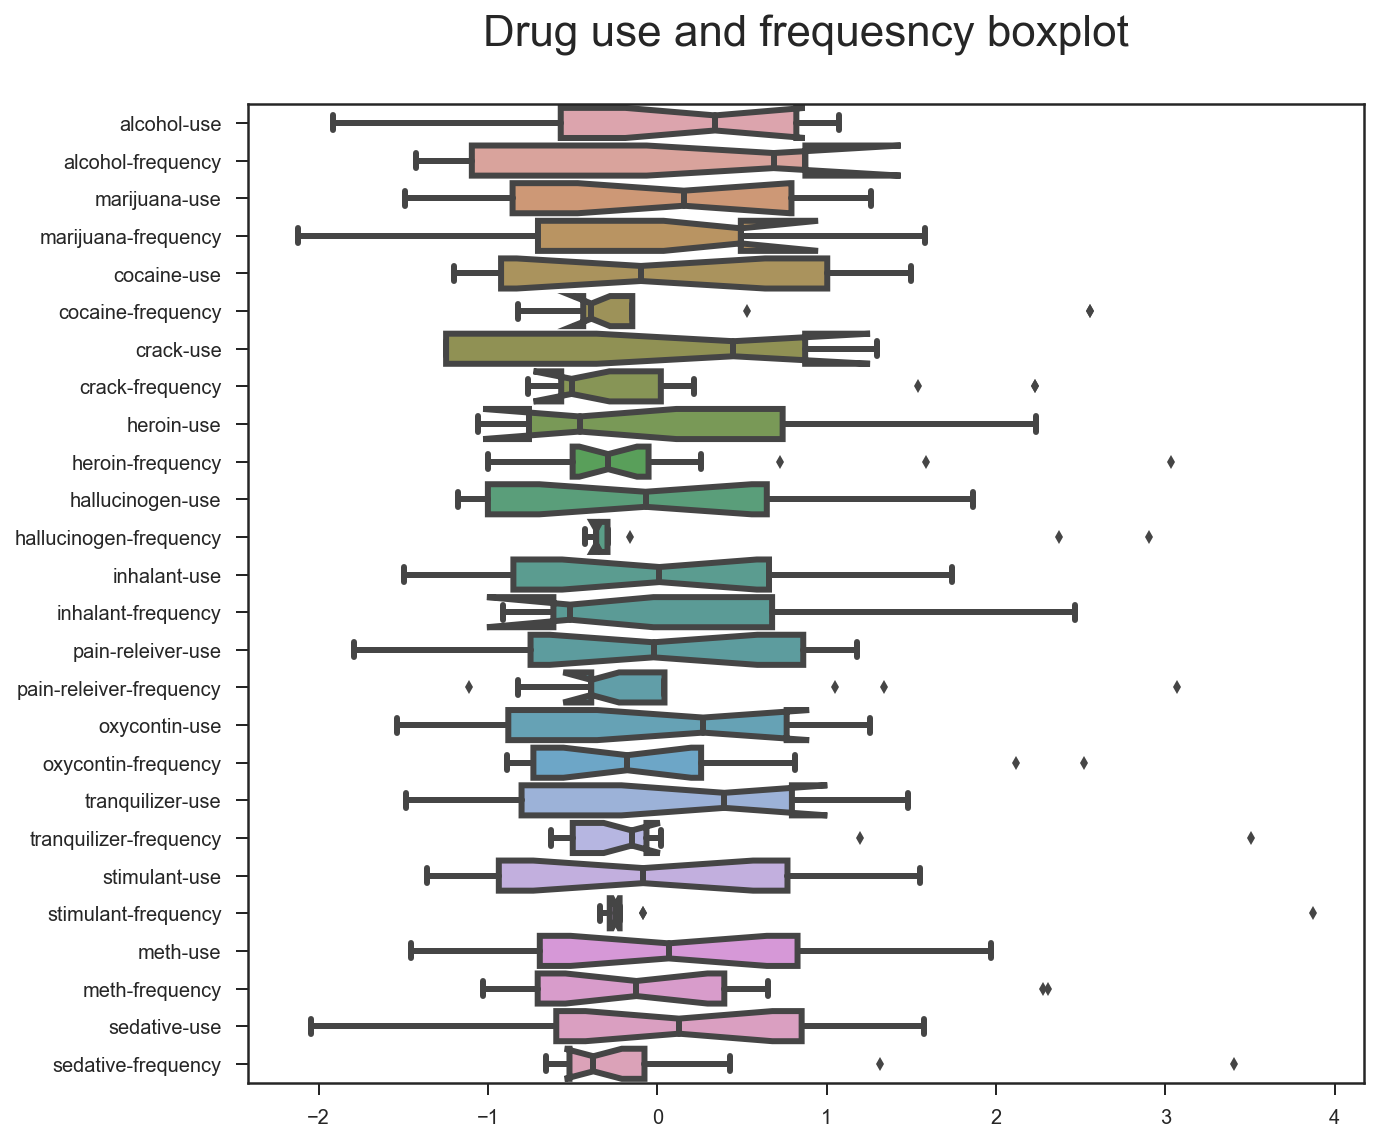

In [142]:
#standadized
drug_use_calculation =drug_use.loc[:,'alcohol-use':'sedative-frequency']
drug_use_stand = (drug_use_calculation - drug_use_calculation.mean()) / drug_use_calculation.std()

fig = plt.figure(figsize=(10,9)) #12,6
ax = fig.gca()
ax = sns.boxplot(data=drug_use_stand, orient='h', fliersize=5, linewidth=3, notch=True,
                saturation=0.5, ax=ax)
ax.set_title('Drug use and frequesncy boxplot\n',fontsize=22)
plt.show()

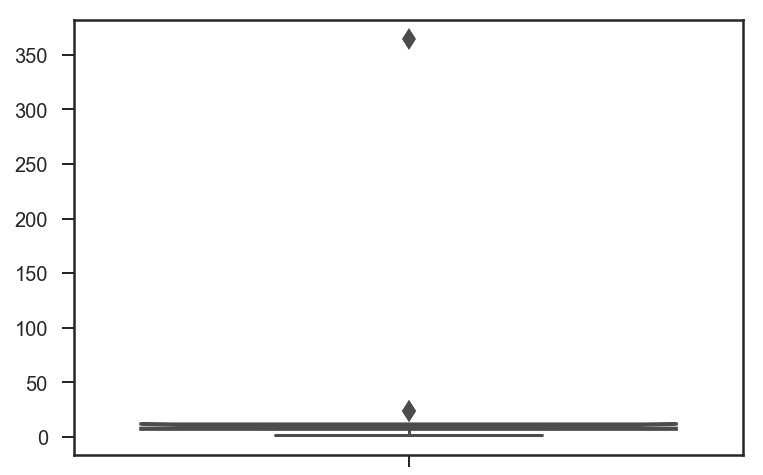

In [196]:
#use to see outlier
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

ax = sns.boxplot(drug_use.loc[:,['stimulant-frequency']], orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

highest drug frequency : heroin, marijuana, alcohol
highest drug usage : alcohol, marijuana, pain-reiliver 
highest drug consumption : alcohol, marijuana, pain-reiliver 
highest age on drug frequency : 65+, 50-64,35-49, 30-34, stimulant, heroin, sedative
higest age on drug usage : 20, 21,22-23,24-25, alcohol, marijuana, pain-reiliver


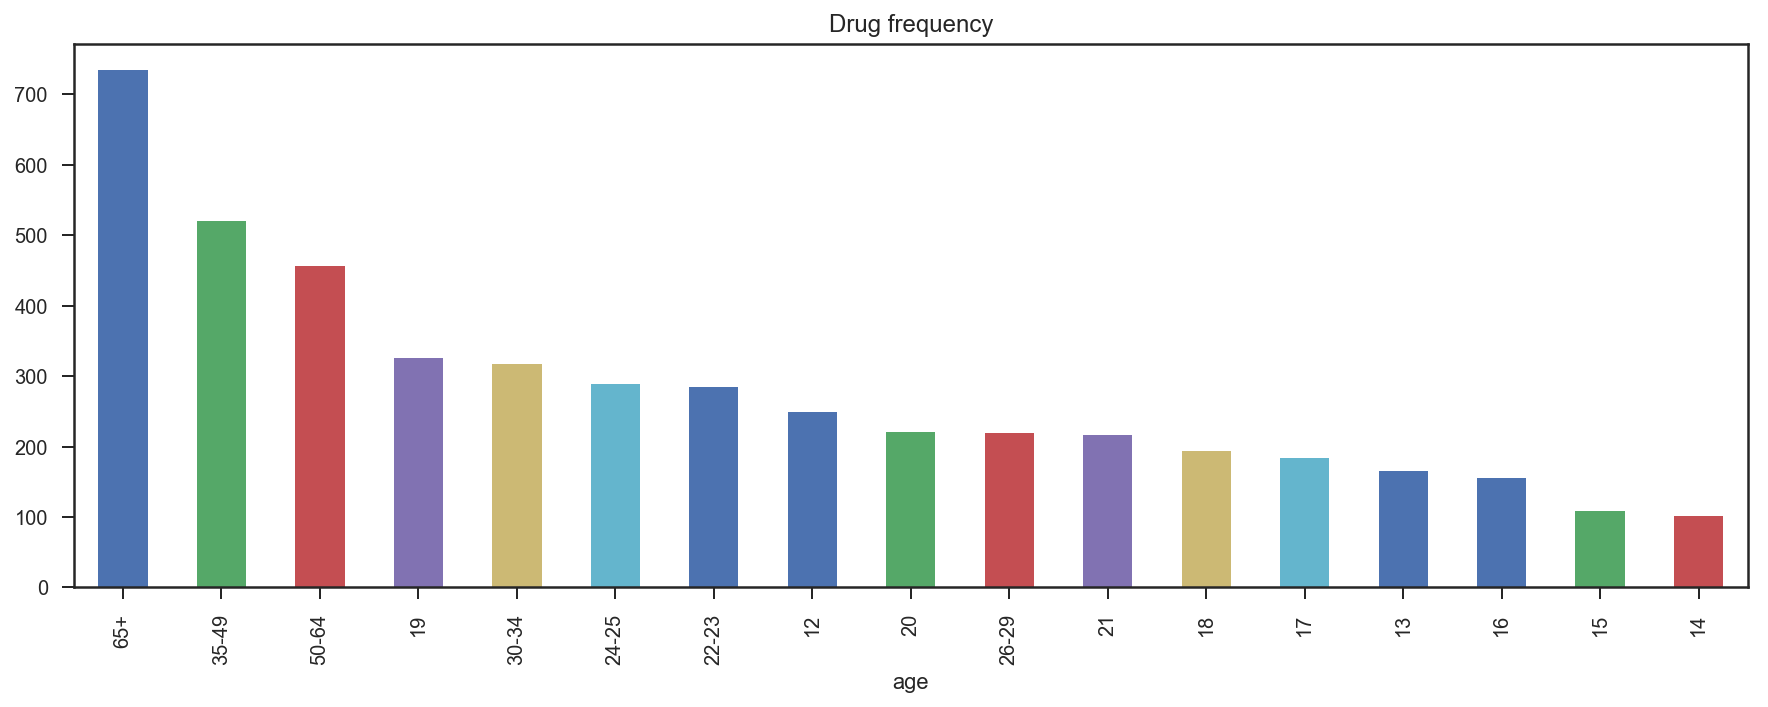

In [151]:
#transpose
t_drug =drug_use.copy()
#tdrug=t_drug.T
t_drug.set_index('age',inplace= True)
tdrug=t_drug.T

drug_frequency =t_drug[['alcohol-frequency','marijuana-frequency','cocaine-frequency','crack-frequency',
                           'heroin-frequency', 'hallucinogen-frequency', 'inhalant-frequency', 
                           'oxycontin-frequency', 'tranquilizer-frequency','stimulant-frequency','sedative-frequency',
                           'pain-releiver-frequency']]
drug_u =t_drug[['alcohol-use','marijuana-use','cocaine-use','crack-use','heroin-use', 'hallucinogen-use','inhalant-use',
                         'oxycontin-use','tranquilizer-use','stimulant-use','sedative-use','pain-releiver-use' ]]

t_drug_frequency =drug_frequency.T
#plt.figure(figsize=(28,8))
#plt.plot(t_drug_frequency,linestyle='-')

#print(t_drug_frequency.sum().sort_values(ascending = False))
#print(t_drug_usage.sum().sort_values(ascending = False))
t_drug_usage =drug_u.T
t_drug_frequency.sum().sort_values(ascending = False).plot(kind='bar', figsize=(15,5), title = 'Drug frequency')


################
print('highest drug frequency : heroin, marijuana, alcohol')
print('highest drug usage : alcohol, marijuana, pain-reiliver ')
print('highest drug consumption : alcohol, marijuana, pain-reiliver ')
print('highest age on drug frequency : 65+, 50-64,35-49, 30-34, stimulant, heroin, sedative')
print ('higest age on drug usage : 20, 21,22-23,24-25, alcohol, marijuana, pain-reiliver')

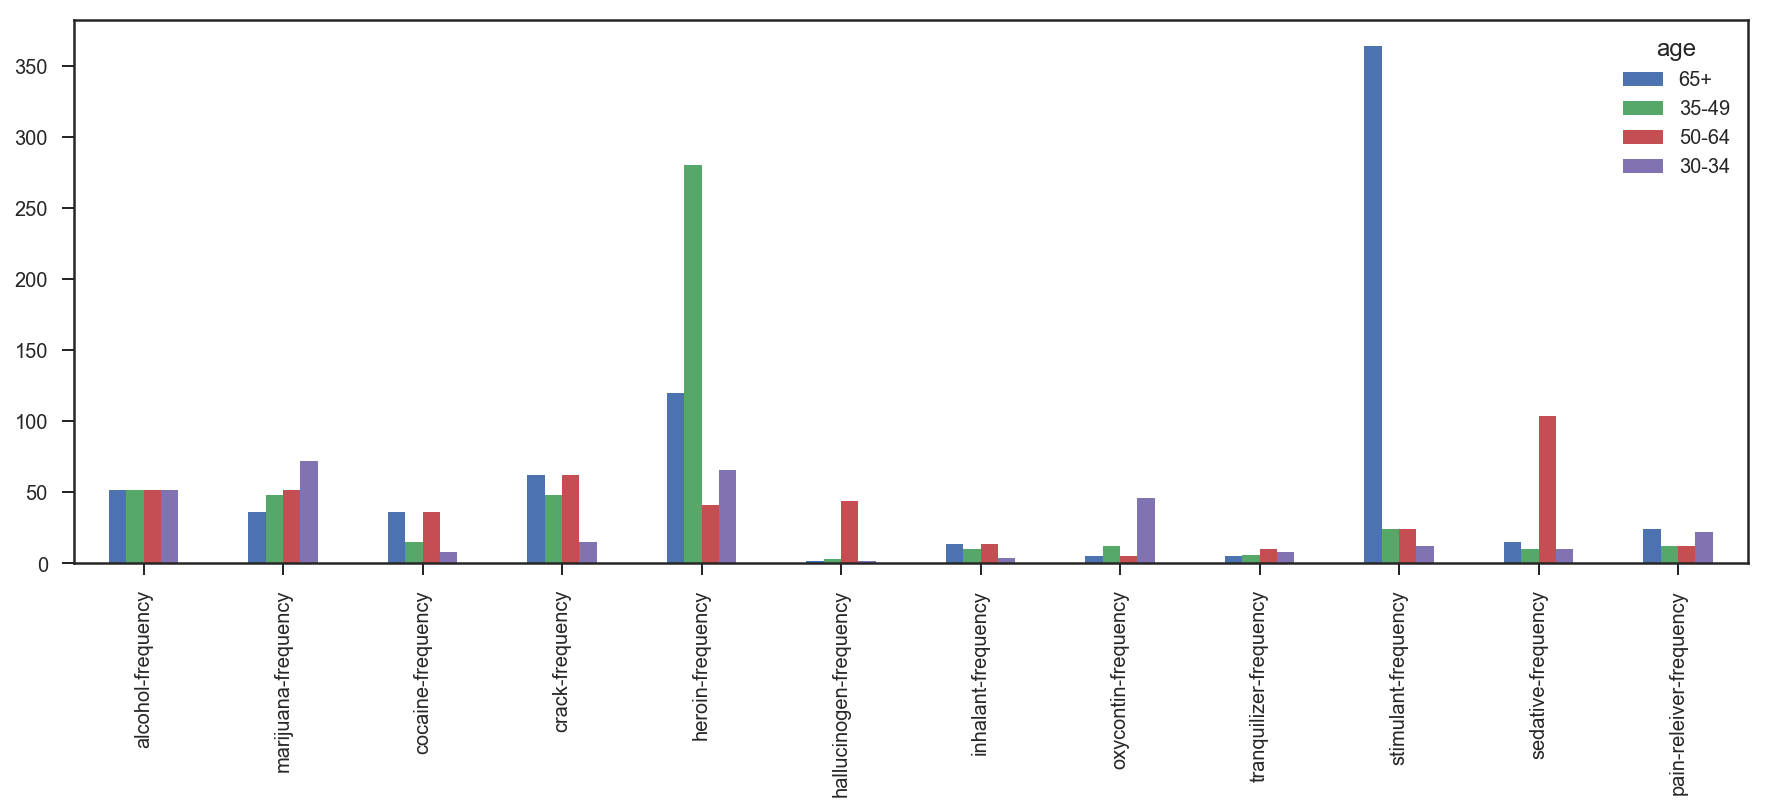

In [159]:
#highest frequency of drug use
t_drug_frequency.loc[:,['65+','35-49','50-64', '30-34']].plot(kind='bar', figsize=(15,5))

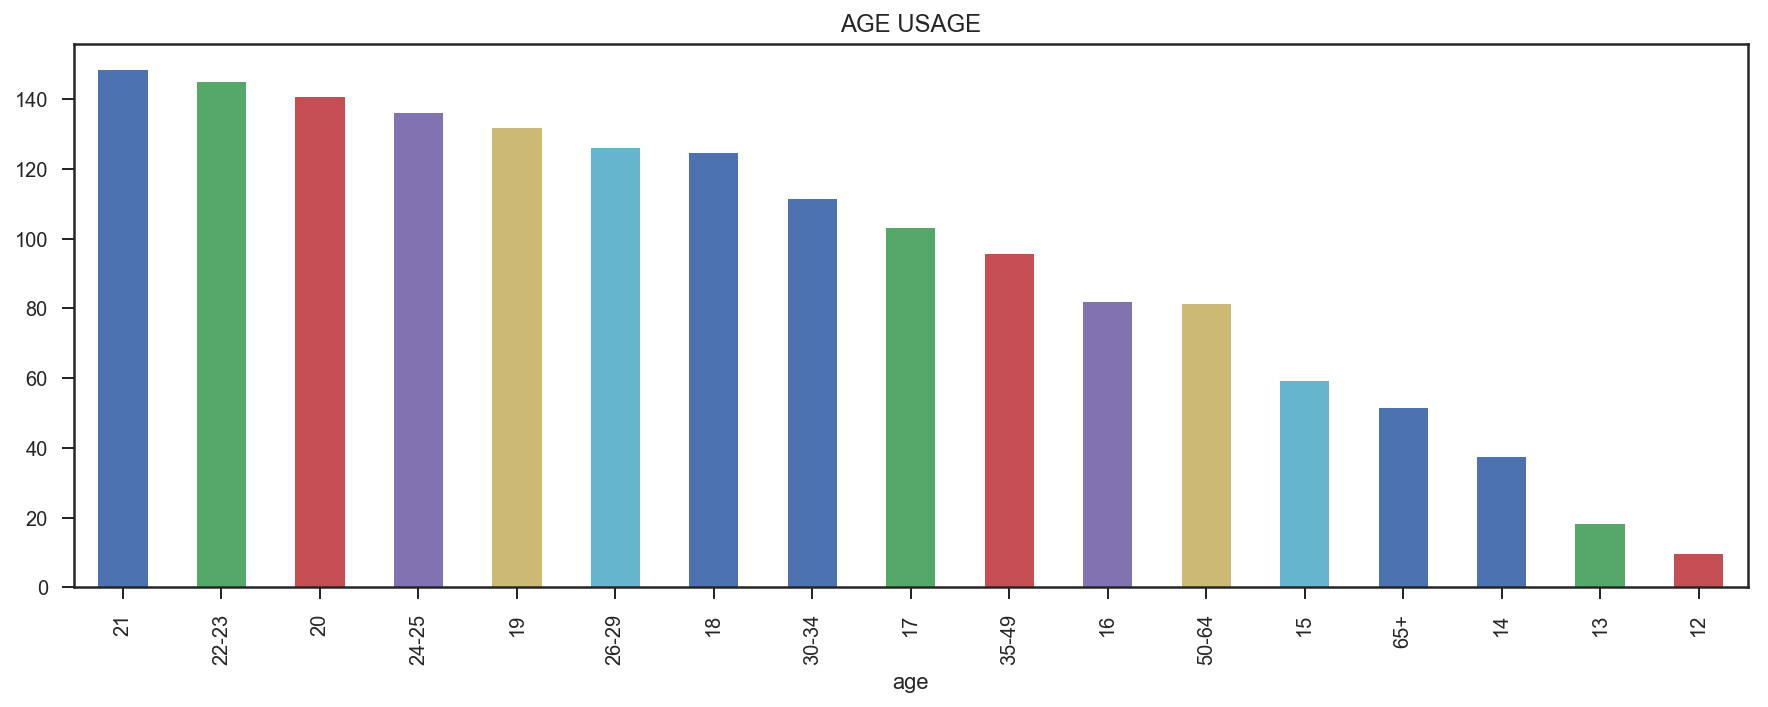

In [160]:
t_drug_usage.sum().sort_values(ascending = False).plot(kind='bar', figsize=(15,5), title = 'AGE USAGE')

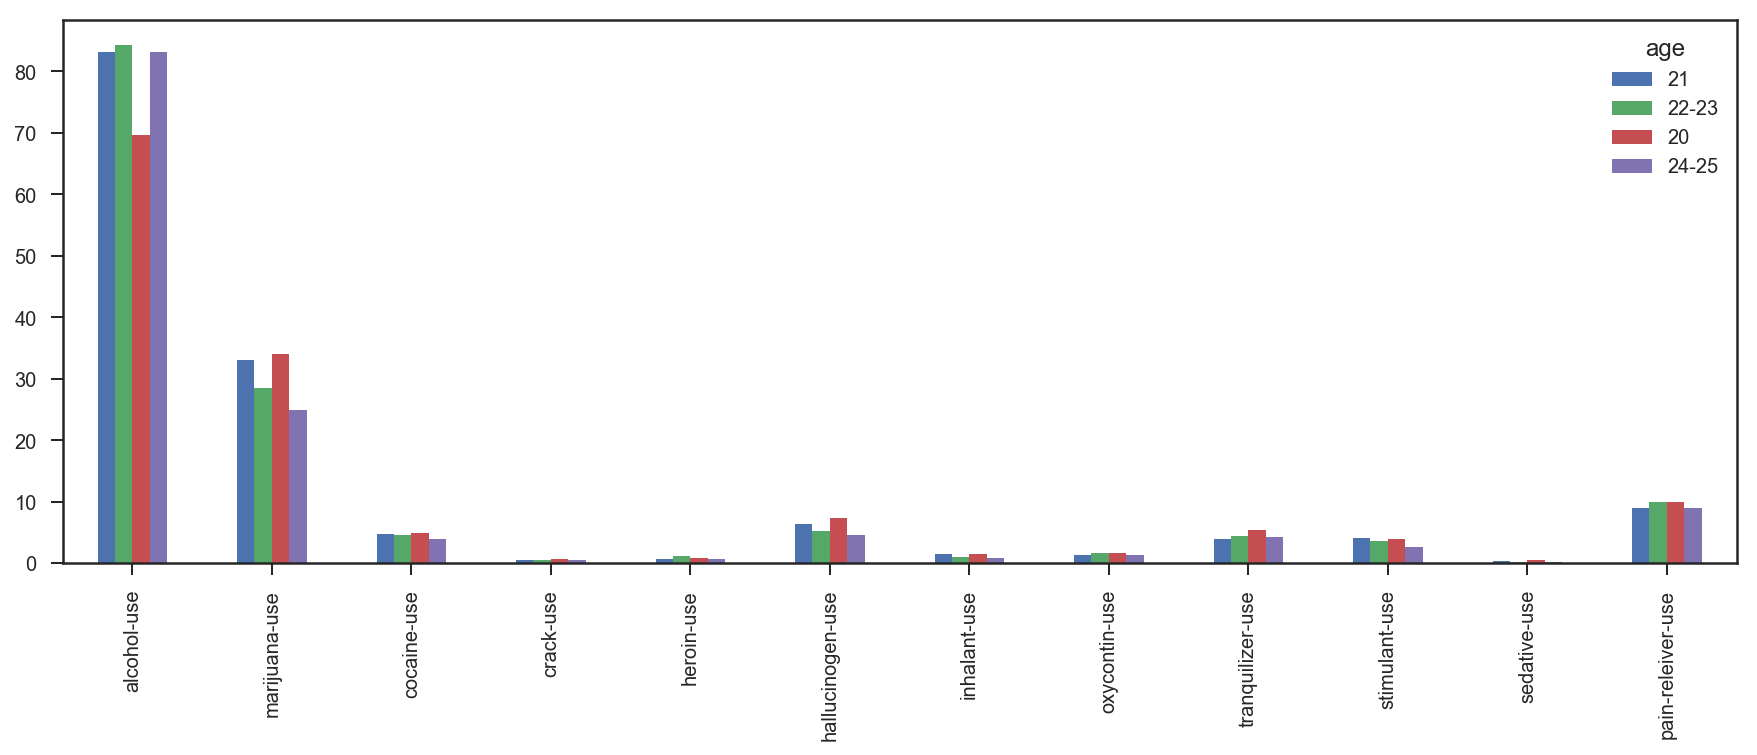

In [161]:
#highest usage of drug use
t_drug_usage.loc[:,['21','22-23','20','24-25']].plot(kind='bar', figsize=(15,5))

In [154]:
#t_drug_usage.sum().sort_values(ascending = False).plot(kind='bar', figsize=(15,5), title = 'AGE USAGE')
t_drug_usage.sum().sort_values(ascending = False).head(4)

age
21       148.4
22-23    144.8
20       140.6
24-25    135.9
dtype: float64

highest drug frequency : Herion, marijuana, alcohol
highest drug usage : alcohol, marijuana, pain-reiliver 


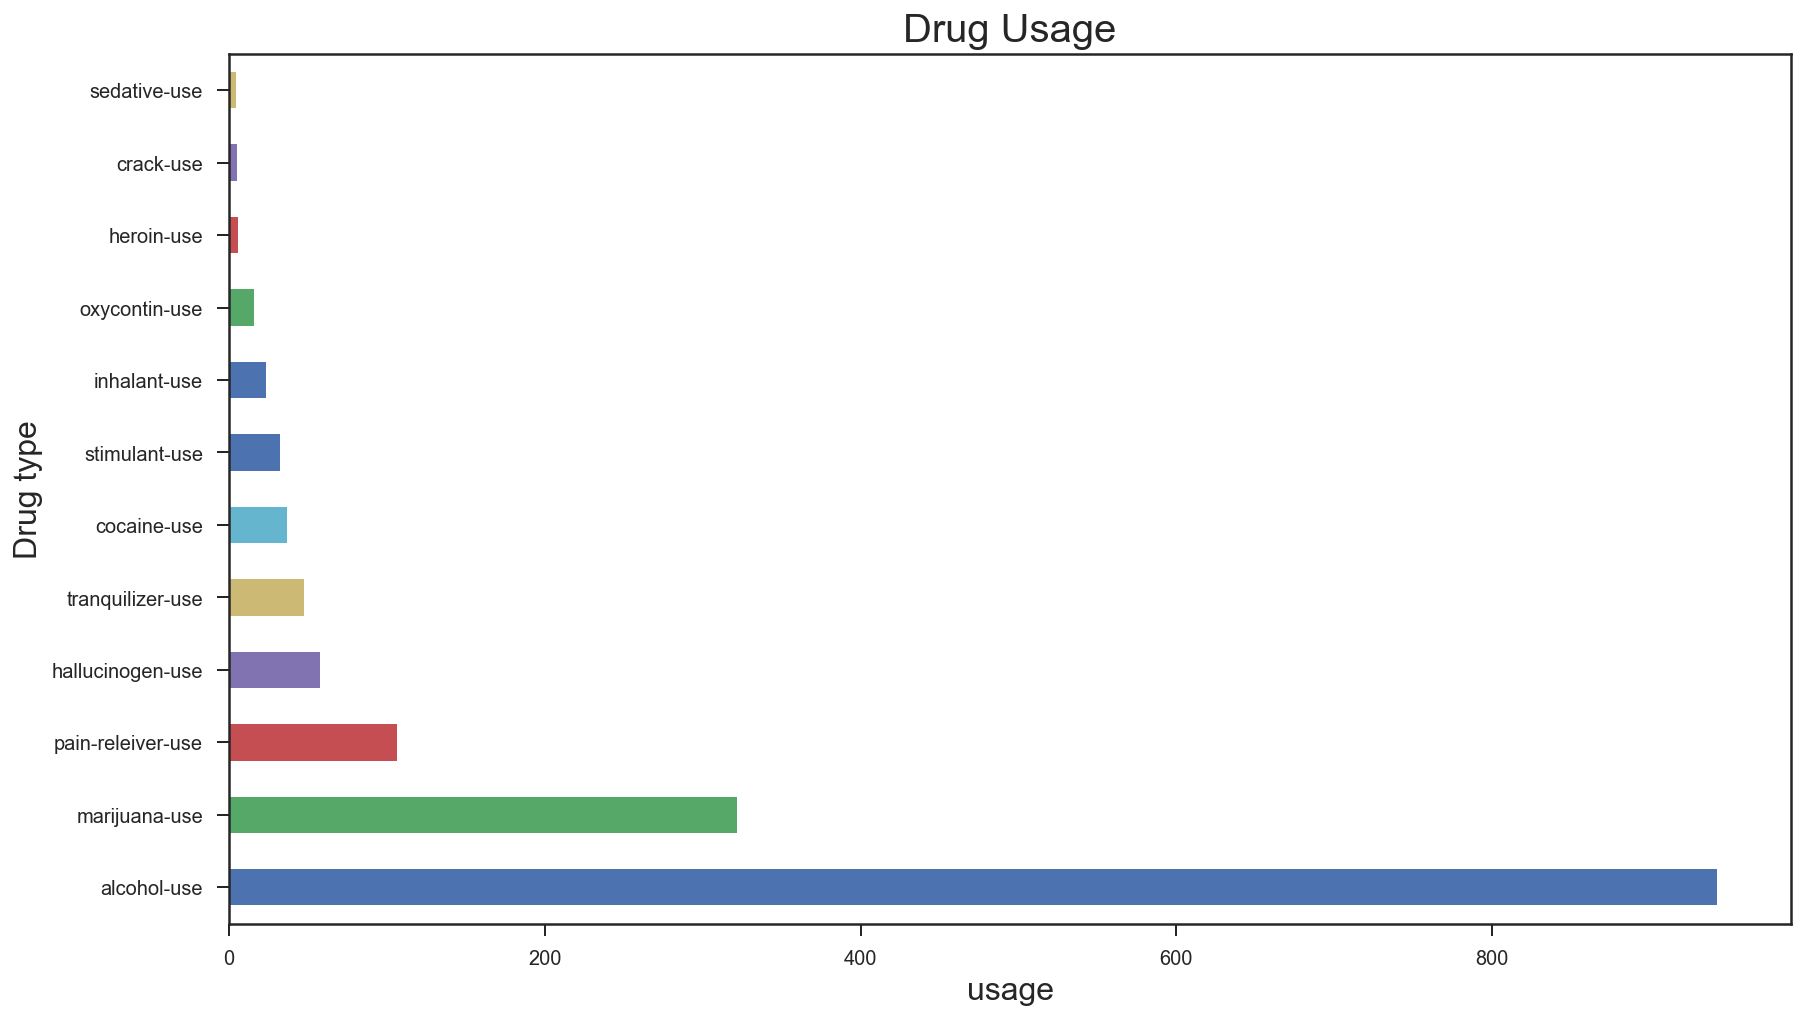

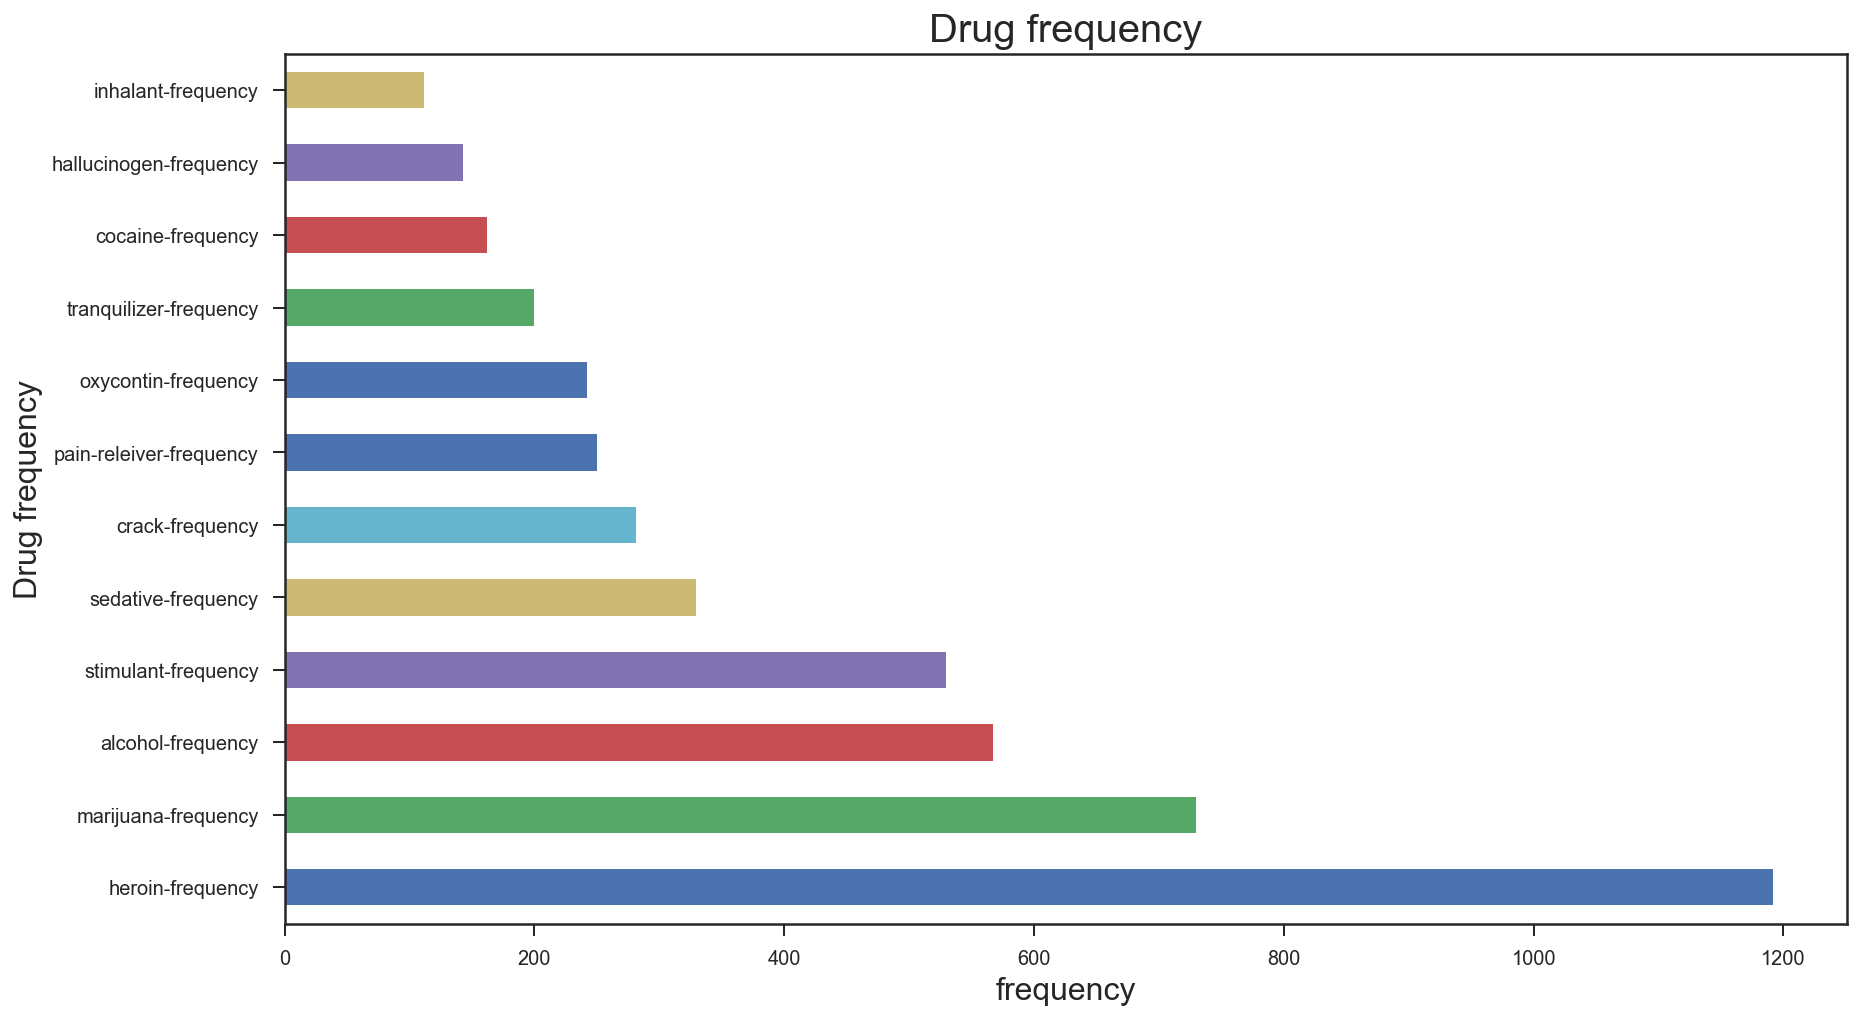

In [158]:
#know the drug usage per age
#plt.figure(figsize=(14,8))
#plt.title('Drug Per Age', fontsize =(14))
#plt.plot(t_drug['alcohol-use'] , 'v')
#plt.plot(t_drug['marijuana-use'] , 'o')
#plt.plot(t_drug['pain-releiver-use'] , '--')
#plt.plot(t_drug['sedative-use'] , '-')
#plt.plot(t_drug['hallucinogen-use'] , '-')
#plt.plot(t_drug['tranquilizer-use'] , '-')
#plt.plot(t_drug['cocaine-use'] , '-')
#plt.plot(t_drug['stimulant-use'] , '-')
#plt.plot(t_drug['inhalant-use'] , '-')
#plt.plot(t_drug['oxycontin-use'] , '-')
#plt.plot(t_drug['heroin-use'] , '-')
#plt.plot(t_drug['crack-use'] , '-')
#plt.legend(loc='upper left')

#drug usage
fig = plt.figure(figsize=(14,8))
ax = fig.gca()

ax = drug_use.loc [:,[ 'alcohol-use','marijuana-use','cocaine-use','crack-use','heroin-use', 'hallucinogen-use','inhalant-use'
                        , 'oxycontin-use','tranquilizer-use','stimulant-use','sedative-use','pain-releiver-use' ]].sum().sort_values(ascending = False).plot(kind='barh', ax=ax)
ax.set_ylabel('Drug type', fontsize=16)
ax.set_xlabel('usage', fontsize=16)
ax.set_title('Drug Usage', fontsize=20)

fig = plt.figure(figsize=(14,8))
ax = fig.gca()
ax =drug_use.loc [:,['alcohol-frequency','marijuana-frequency','cocaine-frequency','crack-frequency','heroin-frequency','hallucinogen-frequency','inhalant-frequency',
                       'oxycontin-frequency','tranquilizer-frequency', 'stimulant-frequency','sedative-frequency','pain-releiver-frequency']].sum().sort_values(ascending = False).plot(kind='barh', ax=ax)
ax.set_ylabel('Drug frequency', fontsize=16)
ax.set_xlabel('frequency', fontsize=16)
ax.set_title('Drug frequency', fontsize=20)


print('highest drug frequency : Herion, marijuana, alcohol')
print('highest drug usage : alcohol, marijuana, pain-reiliver ')

In [156]:
#make consumption
drug_comsumption = drug_use[['age','n']] 
drug_comsumption['alcohol consumption']=drug_use['alcohol-use'] *drug_use['alcohol-frequency']
drug_comsumption['marijuana consumption']=drug_use['marijuana-use'] *drug_use['marijuana-frequency']
drug_comsumption['cocaine consumption']=drug_use['cocaine-use'] *drug_use['cocaine-frequency']
drug_comsumption['crack consumption']=drug_use['crack-use'] *drug_use['crack-frequency']
drug_comsumption['heroin consumption']=drug_use['heroin-use'] *drug_use['heroin-frequency']
drug_comsumption['hallucinogen consumption']=drug_use['hallucinogen-use'] *drug_use['hallucinogen-frequency']
drug_comsumption['inhalant consumption']=drug_use['inhalant-use'] *drug_use['inhalant-frequency']
drug_comsumption['pain-releiver consumption']=drug_use['pain-releiver-use'] *drug_use['pain-releiver-frequency']
drug_comsumption['oxycontin consumption']=drug_use['oxycontin-use'] *drug_use['oxycontin-frequency']
drug_comsumption['tranquilizer consumption']=drug_use['tranquilizer-use'] *drug_use['tranquilizer-frequency']
drug_comsumption['stimulant consumption']=drug_use['stimulant-use'] *drug_use['stimulant-frequency']
drug_comsumption['sedative consumption']=drug_use['sedative-use'] *drug_use['sedative-frequency']
drug_comsumption['pain-releiver consumption']=drug_use['pain-releiver-use'] *drug_use['pain-releiver-frequency']



/Users/laurenciatitan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/laurenciatitan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/laurenciatitan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

highest drug consumption : alcohol, marijuana, pain-reiliver 


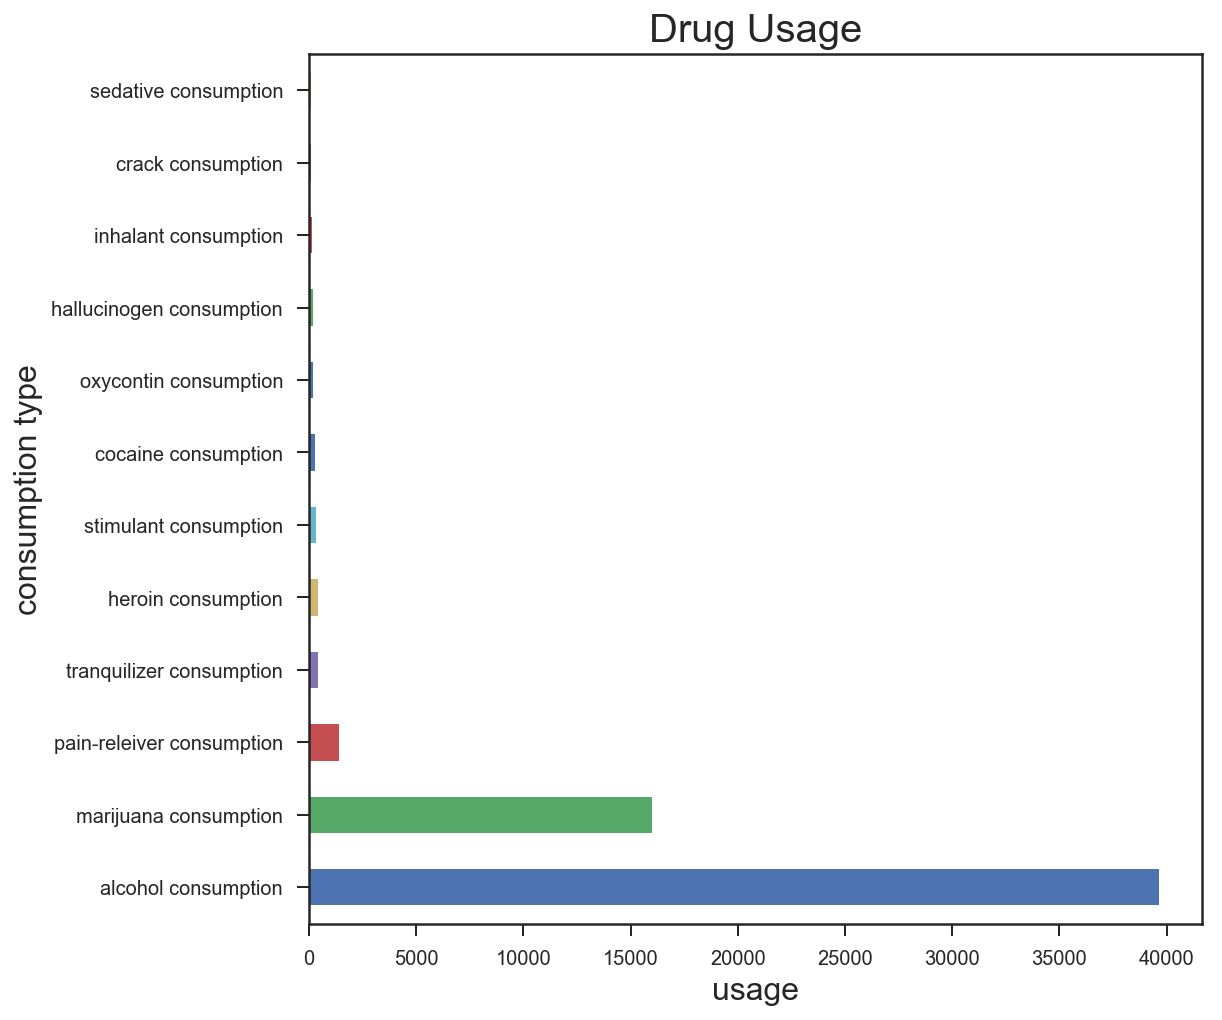

In [157]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

ax = drug_comsumption.loc [:,[ 'alcohol consumption','marijuana consumption','cocaine consumption','crack consumption','heroin consumption', 'hallucinogen consumption','inhalant consumption',
                         'oxycontin consumption','tranquilizer consumption','stimulant consumption','sedative consumption','pain-releiver consumption' ]].sum().sort_values(ascending = False).plot(kind='barh', ax=ax)

ax.set_ylabel('consumption type', fontsize=16)
ax.set_xlabel('usage', fontsize=16)
ax.set_title('Drug Usage', fontsize=20)

print('highest drug consumption : alcohol, marijuana, pain-reiliver ')

In [56]:
print(drug_use.loc [:,[ 'alcohol-use','marijuana-use','cocaine-use','crack-use','heroin-use', 'hallucinogen-use'
                        , 'oxycontin-use','tranquilizer-use','stimulant-use','sedative-use','pain-releiver-use' ]].sum().sort_values(ascending = False))
print ('--------------------------------------')
print(drug_use.loc [:,['alcohol-frequency','marijuana-frequency','cocaine-frequency','crack-frequency','heroin-frequency','hallucinogen-frequency','inhalant-frequency','pain-releiver-frequency',
                       'oxycontin-frequency','tranquilizer-frequency', 'stimulant-frequency','sedative-frequency','pain-releiver-frequency']].sum().sort_values(ascending = False))
print ('--------------------------------------')
print (drug_comsumption.loc[:,'alcohol consumption':'sedative consumption'].sum().sort_values(ascending = False))


alcohol-use          942.3
marijuana-use        321.7
pain-releiver-use    106.6
hallucinogen-use      57.7
tranquilizer-use      47.7
cocaine-use           37.0
stimulant-use         32.6
oxycontin-use         15.9
heroin-use             6.0
crack-use              5.0
sedative-use           4.8
dtype: float64
--------------------------------------
heroin-frequency           1191.25
marijuana-frequency         730.00
alcohol-frequency           567.00
stimulant-frequency         529.50
sedative-frequency          329.50
crack-frequency             281.75
pain-releiver-frequency     250.00
pain-releiver-frequency     250.00
oxycontin-frequency         242.00
tranquilizer-frequency      199.50
cocaine-frequency           162.00
hallucinogen-frequency      143.00
inhalant-frequency          112.00
dtype: float64
--------------------------------------
alcohol consumption          39660.70
marijuana consumption        15977.30
pain-releiver consumption     1403.00
tranquilizer consumption  

drug usage increase by age and frequency also increase by age


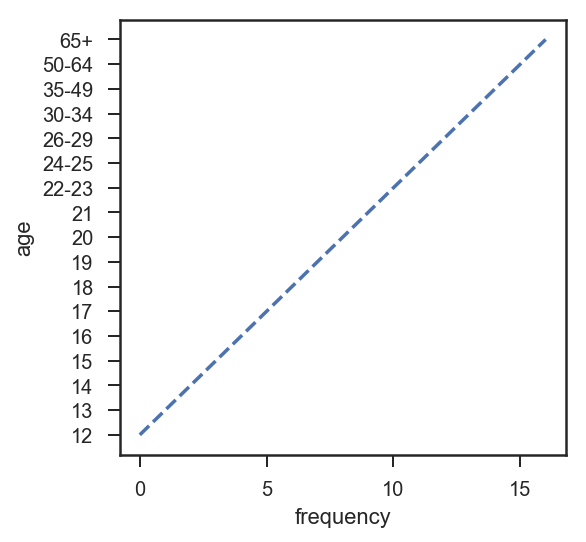

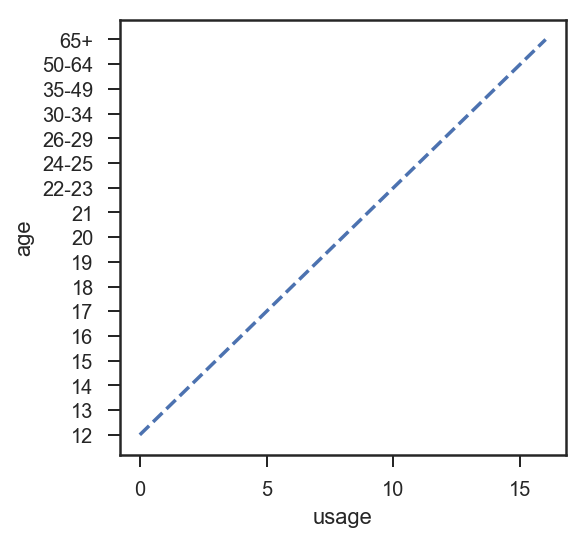

In [57]:
drug_frequency =drug_use[['age','alcohol-frequency','marijuana-frequency','cocaine-frequency','crack-frequency',
                           'heroin-frequency', 'hallucinogen-frequency', 'inhalant-frequency','pain-releiver-frequency', 
                           'oxycontin-frequency', 'tranquilizer-frequency','stimulant-frequency','sedative-frequency',
                           'pain-releiver-frequency']]
plt.figure(figsize=(4,4)) 
plt.plot(drug_frequency['age'],linestyle='--')
plt.ylabel('age',)
plt.xlabel('frequency')


drug_u =drug_use[['age','alcohol-use','marijuana-use','cocaine-use','crack-use','heroin-use', 'hallucinogen-use','inhalant-use',
                        'pain-releiver-use', 'oxycontin-use','tranquilizer-use','stimulant-use','sedative-use','pain-releiver-use' ]]

plt.figure(figsize=(4,4)) 
plt.plot(drug_u['age'],linestyle='--')
plt.ylabel('age',)
plt.xlabel('usage')

print('drug usage increase by age and frequency also increase by age')

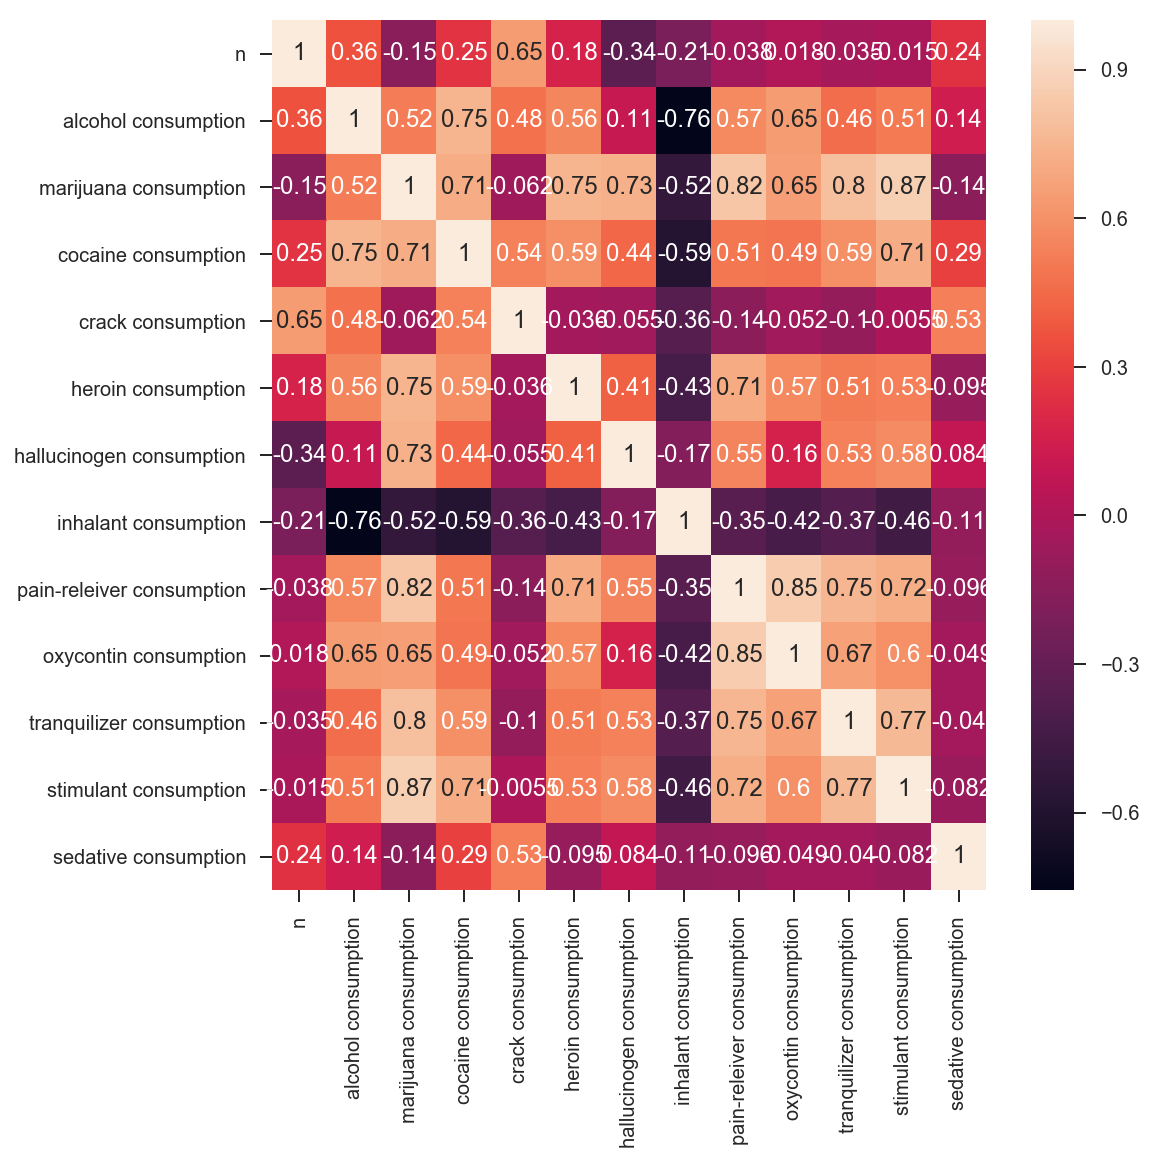

In [58]:
plt.figure(figsize=(8,8))
display (sns.heatmap(drug_comsumption.corr(), annot=True ))

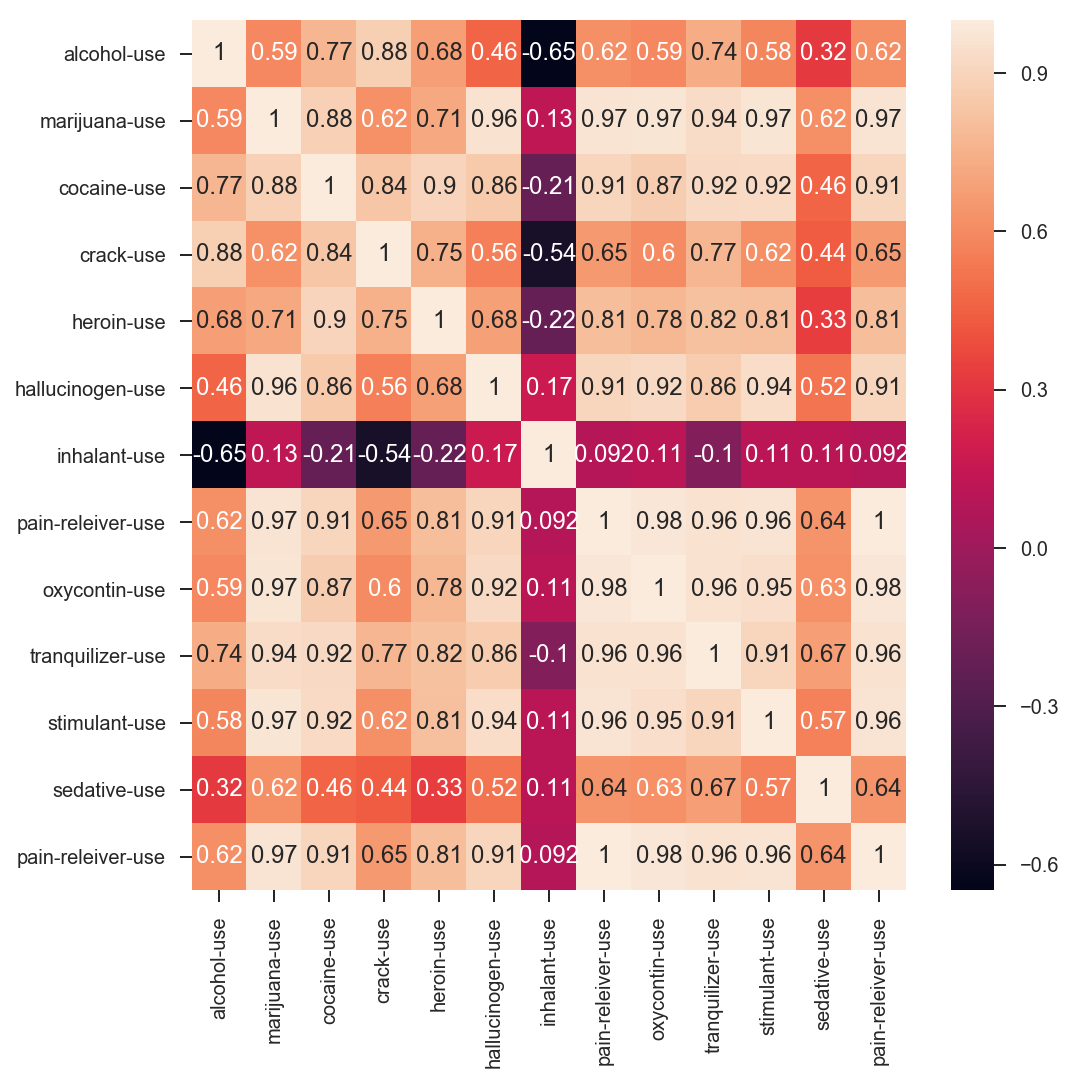

In [59]:
plt.figure(figsize=(8,8))
sns.heatmap(drug_use.loc [:,[ 'alcohol-use','marijuana-use','cocaine-use','crack-use','heroin-use', 'hallucinogen-use','inhalant-use',
                        'pain-releiver-use', 'oxycontin-use','tranquilizer-use','stimulant-use','sedative-use','pain-releiver-use' ]].corr(), annot=True )

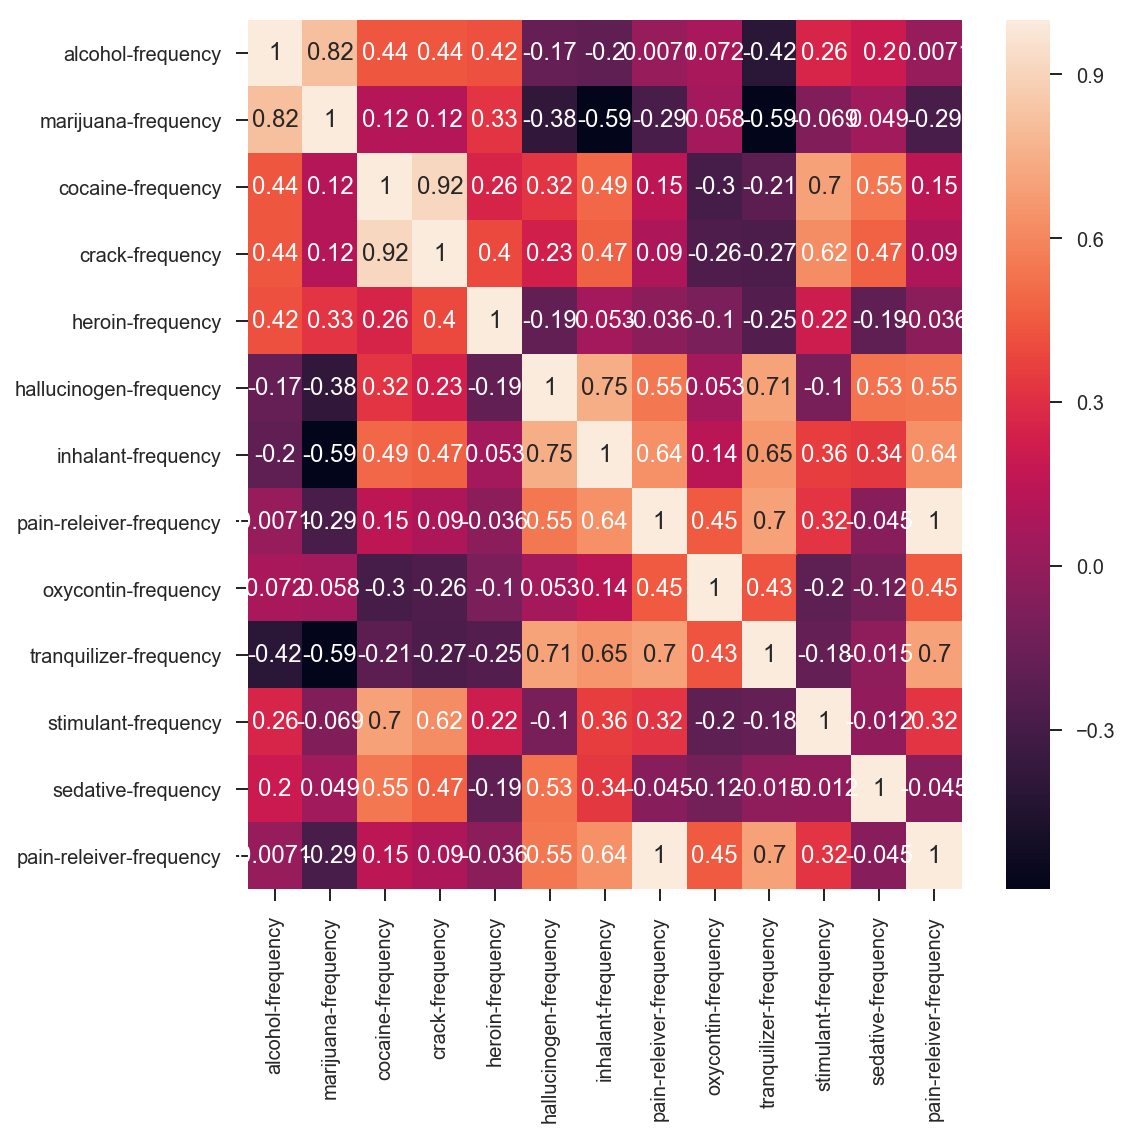

In [60]:
plt.figure(figsize=(8,8))
sns.heatmap(drug_use.loc [:,['alcohol-frequency','marijuana-frequency','cocaine-frequency','crack-frequency',
                           'heroin-frequency', 'hallucinogen-frequency', 'inhalant-frequency','pain-releiver-frequency', 
                           'oxycontin-frequency', 'tranquilizer-frequency','stimulant-frequency','sedative-frequency',
                           'pain-releiver-frequency']].corr(), annot=True)


In [61]:
#col=[colname for colname in drug_use.columns if 'use' in colname]

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
crack use vs majuarina use
 mean and standard is similar, b
 
 null hypotesis no significant difference in populaton
 alternative hypes


- Correlations between variables


- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**
1. Correlations between variables
   H_o : (no effect) cocaine use does not have effect marijuana use
2. H_A: cocaine use there is effect marijuana use 

** result**
This is two tail hypotesis:Scipy t-statistic: t = -5.71  p = 2.72e-05, Accept null hypothesis. There is no significant different between         the dataset

In [187]:
#drug_use.corr()
#sns.pairplot(drug_use.loc[:,['cocaine-use','marijuana-use']])
drug_use['stimulant-frequency'].unique

<bound method Series.unique of 0       2.0
1       4.0
2      12.0
3       6.0
4       9.5
5       9.0
6       8.0
7       6.0
8      12.0
9      10.0
10     10.0
11     10.0
12      7.0
13     12.0
14     24.0
15     24.0
16    364.0
Name: stimulant-frequency, dtype: float64>

In [197]:
#second hypotesis
drug_use.loc[:,['alcohol-frequency','stimulant-frequency']].mean()

alcohol-frequency      33.352941
stimulant-frequency    31.147059
dtype: float64

Variance: 3922.992647
('correlation', 0.2603040439960488, 'p value', 0.3129529799515566)
('spearmanr', 0.6103562356217257, 'p value', 0.00926520759859895)
difference between averages = 2.21

0.9193552449403033
0.05
Scipy t-statistic: t = -0.10  p = 9.19e-01
Accept null hypothesis. There is no relation between alcohol and stimulant frequency.
_____________
sample1
Our sample median is 48.0
The mean is 33.35294117647059.
The standard deviation is 20.682306096446982.
The standard error of the mean is 5.170576524111746.
_____________
sample2
Our sample median is 10.0
The mean is 31.147058823529413.
The standard deviation is 83.4068280294708.
The standard error of the mean is 20.8517070073677.


/Users/laurenciatitan/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/laurenciatitan/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


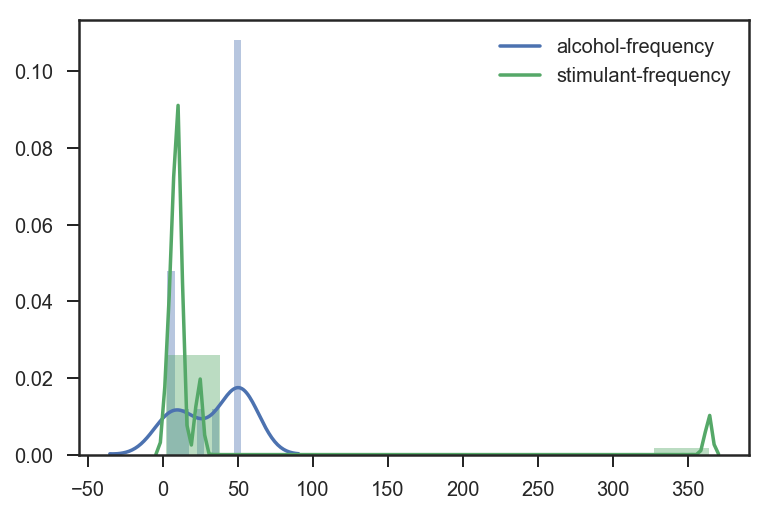

In [199]:
#2 tail
# crack-frequency vs oxycontin-frequency mean()

# H0 : the characteristic behave the same way, there is no difference
# H_A: they are not behave the same way

# Step 2: alpha = 0.05.
#high p values indicate that it is by chance, low p-values are good, is not by chance
p = 0.05

#specify what we want to compare
#crack have some null value, using inrerpolate
sample1= drug_use['alcohol-frequency'].interpolate(limit=10, limit_direction='both').values
sample2= drug_use['stimulant-frequency'].interpolate(limit=10, limit_direction='both').values

#measure the noise ,eg. the noise is very high because the data is spread
def sample_variance(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    dev1 = np.sum([(x - np.mean(sample1))**2 for x in sample1])
    dev2 = np.sum([(x - np.mean(sample2))**2 for x in sample2])
    s2 = float(dev1 + dev2) / (n1 + n2 - 2)
    return s2
variance = sample_variance(sample1, sample2)
print('Variance: {:2f}'.format(variance))


#Calculate a Pearson correlation coefficient and the p-value for testing non-correlation.
pearsonlist = stats.pearsonr(sample1, sample2)
print ('correlation',pearsonlist[0],'p value',pearsonlist[1])

#spearmanr
spearmanr=stats.spearmanr(sample1, sample2)
print('spearmanr',spearmanr[0],'p value',spearmanr[1])

print('difference between averages = {:.2f}'.format(np.mean(sample1)-np.mean(sample2)))

print ('')
# scipy t student
t_stat = stats.ttest_ind(sample2, sample1,equal_var = False)
t_value = t_stat[0]
p_value = t_stat[1]
print (p_value)
print (p)

print('Scipy t-statistic: t = {0:.2f}  p = {1:.2e}'.format(t_stat[0],t_stat[1]))

#feedback
if p_value > p:
    print('Accept null hypothesis. There is no relation between alcohol and stimulant frequency.')
elif p_value < p:
    print('Reject null hypothesis. There IS significant relation between alcohol and stimulant frequency.')
else:
    print('Inconclusive statistics.')

print ('_____________')
print ("sample1")
print("Our sample median is " + str(np.median(sample1)))
print("The mean is " + str(np.mean(sample1)) + ".")
print("The standard deviation is " + str(np.std(sample1)) + ".")
print("The standard error of the mean is " + str(np.std(sample1,ddof = 1)/(len(sample1))**0.5) + ".")
print ('_____________')
print ("sample2")
print("Our sample median is " + str(np.median(sample2)))
print("The mean is " + str(np.mean(sample2)) + ".")
print("The standard deviation is " + str(np.std(sample2)) + ".")
print("The standard error of the mean is " + str(np.std(sample2,ddof = 1)/(len(sample2))**0.5) + ".")


#plot corr vs pvalue
#plt.plot(drug_use['crack-frequency'],drug_use['oxycontin-frequency'],'o')
#plt.title('corr = {0:.3f}, p = {1:.3f}'.format(pearsonlist[0],pearsonlist[1]))

#plt.xlabel('crack-frequency')
#plt.ylabel('oxycontin-frequency')

plt.figure()
sns.distplot(sample1, bins = 10,kde_kws={"label": "alcohol-frequency"})
sns.distplot(sample2, bins = 10,kde_kws={"label": "stimulant-frequency"})


#accept null hyptothesis, they are no relation


#p = high accept null no relation (only by chance) , low reject there relation

age,21,22-23
alcohol-use,83.2,84.2
marijuana-use,33.0,28.4
pain-releiver-use,9.0,10.0
pain-releiver-use,9.0,10.0
hallucinogen-use,6.3,5.2
cocaine-use,4.8,4.5
stimulant-use,4.1,3.6
tranquilizer-use,3.9,4.4
inhalant-use,1.4,1.0
oxycontin-use,1.3,1.7


Ho = there is no relation drug use in age 21 and 22-23
Ha = there is relation drug use in age 21 and 22-23


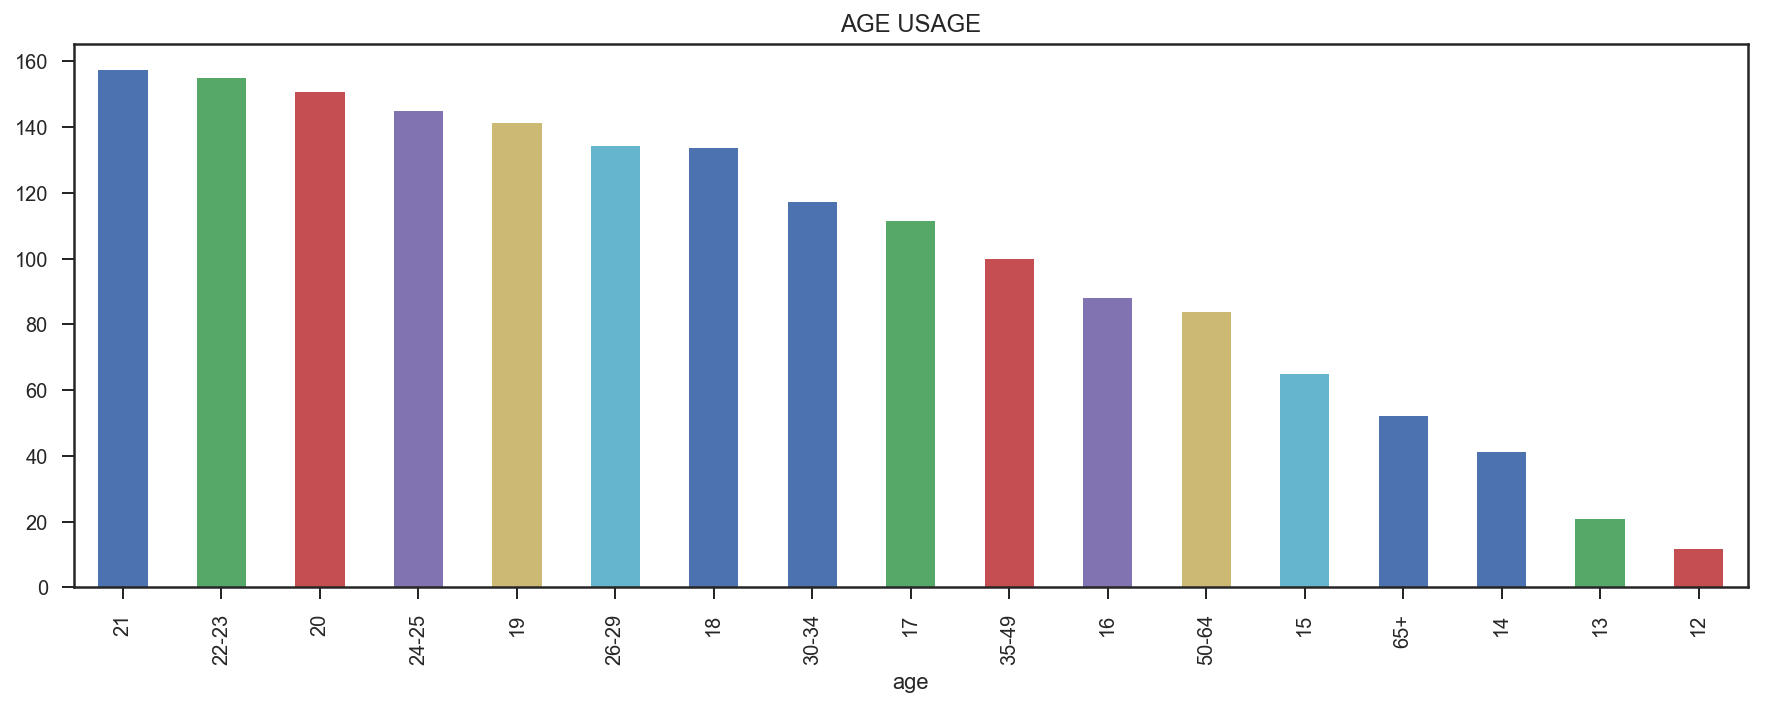

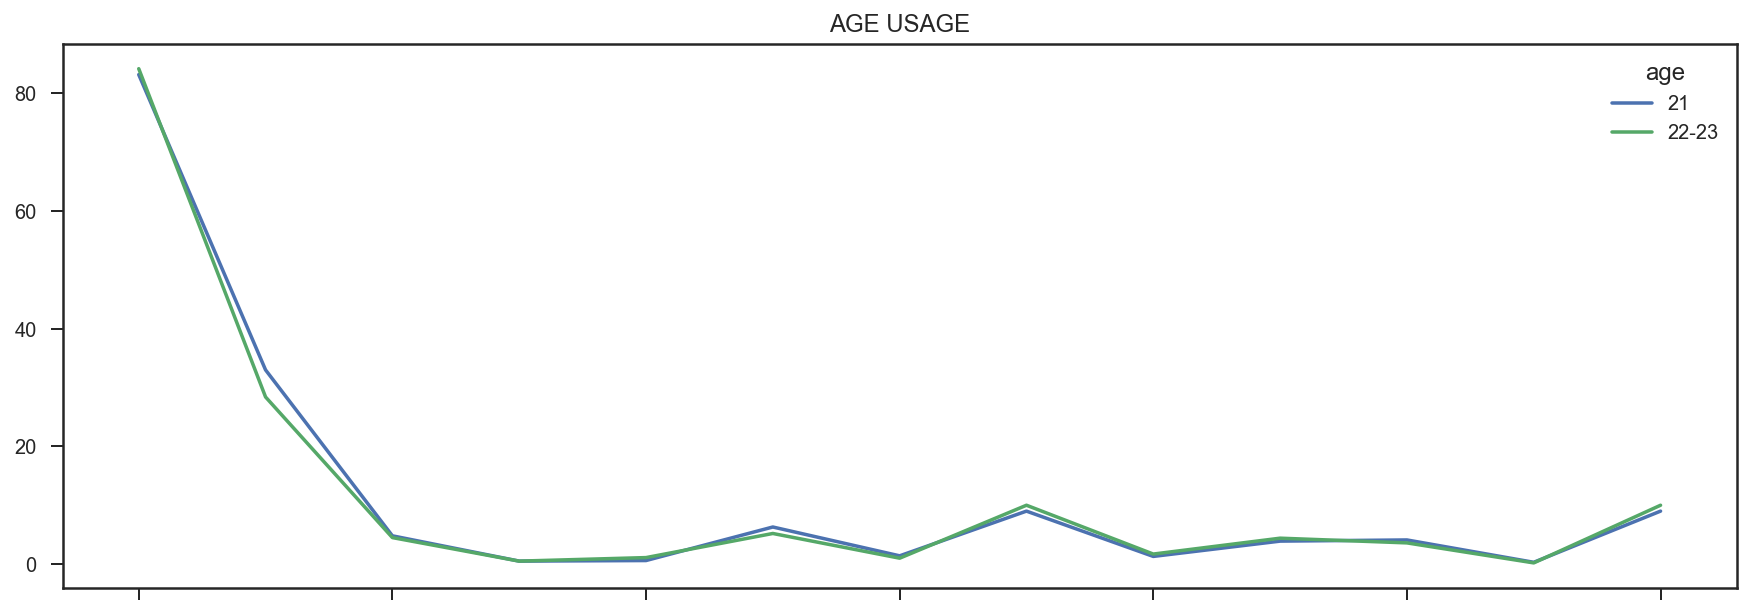

In [65]:
#hypotesis two
t_drug_usage.sum().sort_values(ascending = False).plot(kind='bar', figsize=(15,5), title = 'AGE USAGE')
t_drug_usage.sum().sort_values(ascending = False).head(4)
display (t_drug_usage.loc[:,['21','22-23']].sort_values('21',ascending = False))
t_drug_usage.loc [:,['21','22-23']].plot(kind='line', figsize=(15,5), title = 'AGE USAGE')

#sns.pairplot(t_drug_usage.loc[:,['21','22-23']].sort_values('21',ascending = False))

#2 tail =no realtion, there relation
print('Ho = there is no relation drug use in age 21 and 22-23')
print('Ha = there is relation drug use in age 21 and 22-23')

Variance: 529.353269
('correlation', 0.9979544497603783, 'p value', 1.7171793810460725e-14)
('spearmanr', 0.977961432506887, 'p value', 7.875171972189653e-09)

Scipy t-statistic: t = -0.02  p = 9.83e-01
difference between averages = 0.20
Accept null hypothesis. There is no significant correlation between the dataset.
_____________
sample1
Our sample median is 4.1
The mean is 12.10769230769231.
The standard deviation is 22.13001656429779.
The standard error of the mean is 6.388385510284104.
_____________
sample2
Our sample median is 4.4
The mean is 11.907692307692306.
The standard deviation is 22.080080181657003.
The standard error of the mean is 6.373970118304096.


/Users/laurenciatitan/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/laurenciatitan/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


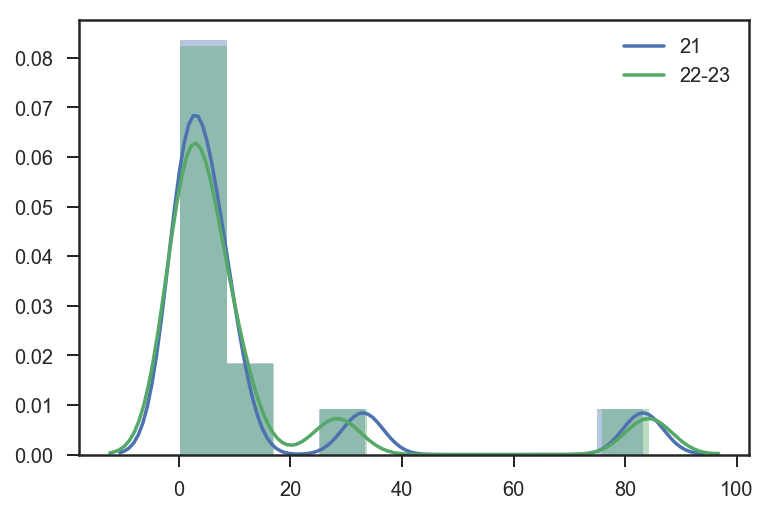

In [66]:
# Step 2: alpha = 0.05.
#high p values indicate that it is by chance, low p-values are good, is not by chance
p = 0.05

#specify what we want to compare
sample1= t_drug_usage['21'].values
sample2=t_drug_usage['22-23'].values

#measure the noise ,eg. the noise is very high because the data is spread
def sample_variance(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    dev1 = np.sum([(x - np.mean(sample1))**2 for x in sample1])
    dev2 = np.sum([(x - np.mean(sample2))**2 for x in sample2])
    s2 = float(dev1 + dev2) / (n1 + n2 - 2)
    return s2
variance = sample_variance(sample1, sample2)
print('Variance: {:2f}'.format(variance))


#Calculate a Pearson correlation coefficient and the p-value for testing non-correlation.
pearsonlist = stats.pearsonr(sample1, sample2)
print ('correlation',pearsonlist[0],'p value',pearsonlist[1])
#spearmanr
spearmanr=stats.spearmanr(sample1, sample2)
print('spearmanr',spearmanr[0],'p value',spearmanr[1])


print ('')
#scipy t student
t_stat = stats.ttest_ind(sample2, sample1,equal_var = False)
t_value = t_stat[0]
p_value = t_stat[1]
print('Scipy t-statistic: t = {0:.2f}  p = {1:.2e}'.format(t_stat[0],t_stat[1]))
print('difference between averages = {:.2f}'.format(np.mean(sample1)-np.mean(sample2)))



#feedback
if p_value > p:
    print('Accept null hypothesis. There is no significant correlation between the dataset.')
elif p_value < p:
    print('Reject null hypothesis. There IS significant correlation between the dataset.')
else:
    print('Inconclusive statistics.')

print ('_____________')
print ("sample1")
print("Our sample median is " + str(np.median(sample1)))
print("The mean is " + str(np.mean(sample1)) + ".")
print("The standard deviation is " + str(np.std(sample1)) + ".")
print("The standard error of the mean is " + str(np.std(sample1,ddof = 1)/(len(sample1))**0.5) + ".")
print ('_____________')
print ("sample2")
print("Our sample median is " + str(np.median(sample2)))
print("The mean is " + str(np.mean(sample2)) + ".")
print("The standard deviation is " + str(np.std(sample2)) + ".")
print("The standard error of the mean is " + str(np.std(sample2,ddof = 1)/(len(sample2))**0.5) + ".")


#plot corr vs pvalue
#plt.plot(t_drug_usage['21'],t_drug_usage['22-23'],'o')
#plt.title('corr = {0:.3f}, p = {1:.3f}'.format(pearsonlist[0],pearsonlist[1]))
#plt.xlabel('21')
#plt.ylabel('22-23')

plt.figure()
sns.distplot(sample1, bins = 10,kde_kws={"label": "21"})
sns.distplot(sample2, bins = 10,kde_kws={"label": "22-23"})

# accept the null hypothesis, even there is high correlation ,they occur by chance 0.9

Ho = there is no relation frequency use in heroin consumption,tranquilizer consumption 
Ha = there is relation frequency use in age 65+ and 50-64


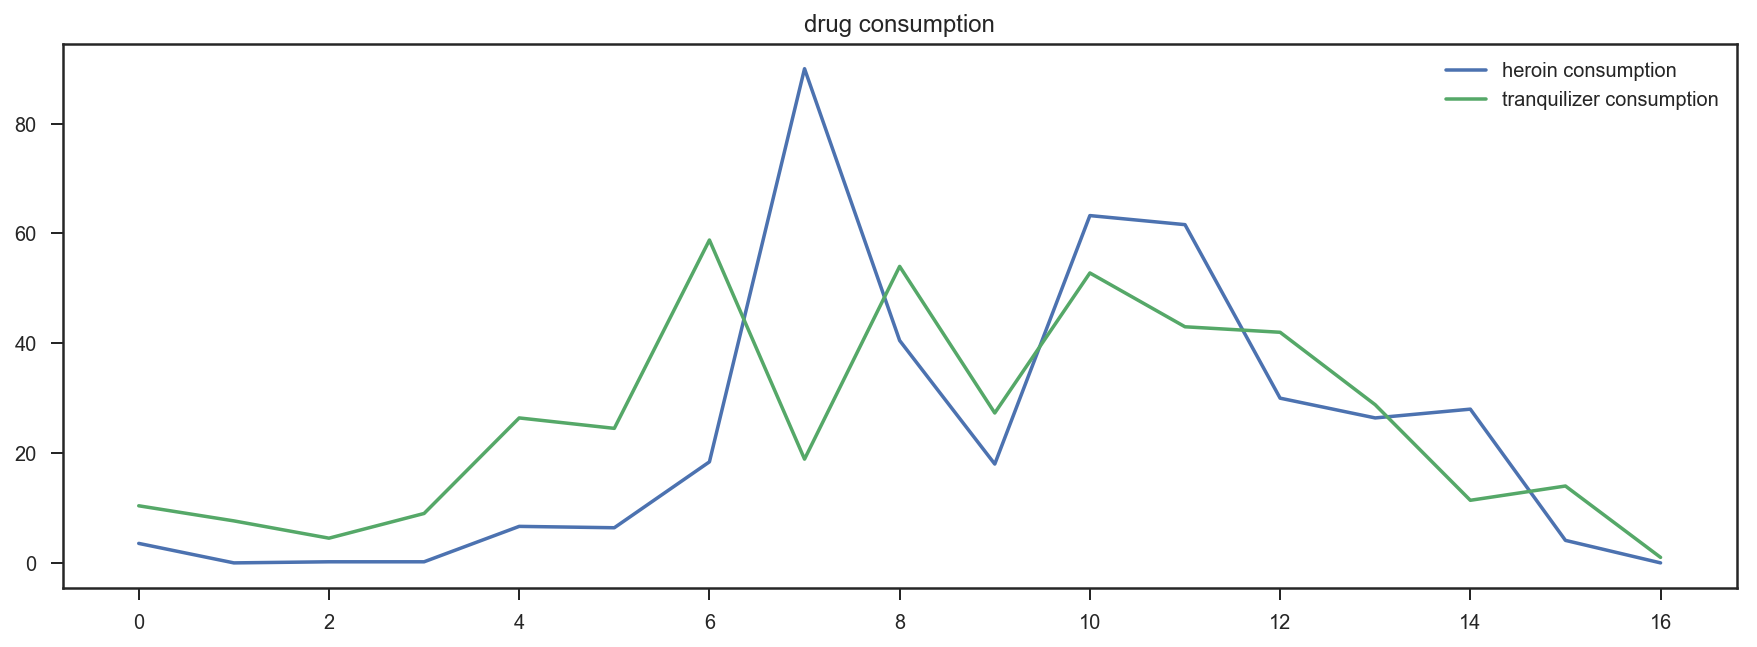

In [67]:
drug_comsumption.loc [:,['heroin consumption', 'tranquilizer consumption']].plot(kind='line', figsize=(15,5), title = 'drug consumption')
t_drug_usage.sum().sort_values(ascending = False).head(4)

#2 tail =no realtion, there relation
print('Ho = there is no relation frequency use in heroin consumption,tranquilizer consumption ')
print('Ha = there is relation frequency use in age 65+ and 50-64')

Variance: 528.323097
('correlation', 0.5135252965196804, 'p value', 0.03499561997857053)
('spearmanr', 0.7656447481237806, 'p value', 0.00034029303129792863)

Scipy t-statistic: t = 0.28  p = 7.83e-01
difference between averages = -2.19
Accept null hypothesis. There is no significant correlation between the dataset.
_____________
sample1
Our sample median is 18.0
The mean is 23.36764705882353.
The standard deviation is 25.90794757221892.
The standard error of the mean is 6.476986893054731.
_____________
sample2
Our sample median is 24.5
The mean is 25.55588235294118.
The standard deviation is 17.9796771085394.
The standard error of the mean is 4.49491927713485.
alcohol-use    55.429412
dtype: float64
alcohol-use    64.6
dtype: float64


/Users/laurenciatitan/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/laurenciatitan/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


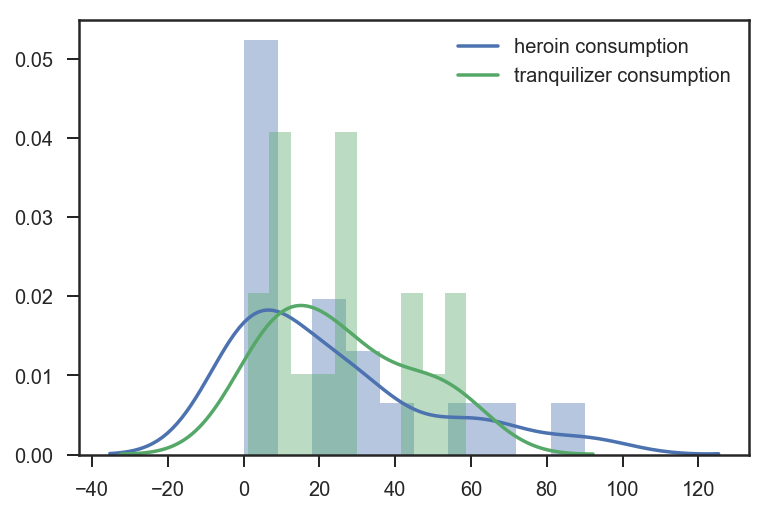

In [68]:
# Step 2: alpha = 0.05.
#high p values indicate that it is by chance, low p-values are good, is not by chance
p = 0.05

#specify what we want to compare
sample1= drug_comsumption['heroin consumption'].values
sample2=drug_comsumption['tranquilizer consumption'].values

#measure the noise ,eg. the noise is very high because the data is spread
def sample_variance(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    dev1 = np.sum([(x - np.mean(sample1))**2 for x in sample1])
    dev2 = np.sum([(x - np.mean(sample2))**2 for x in sample2])
    s2 = float(dev1 + dev2) / (n1 + n2 - 2)
    return s2
variance = sample_variance(sample1, sample2)
print('Variance: {:2f}'.format(variance))


#Calculate a Pearson correlation coefficient and the p-value for testing non-correlation.
pearsonlist = stats.pearsonr(sample1, sample2)
print ('correlation',pearsonlist[0],'p value',pearsonlist[1])
#spearmanr
spearmanr=stats.spearmanr(sample1, sample2)
print('spearmanr',spearmanr[0],'p value',spearmanr[1])


print ('')
#scipy t student
t_stat = stats.ttest_ind(sample2, sample1,equal_var = False)
t_value = t_stat[0]
p_value = t_stat[1]
print('Scipy t-statistic: t = {0:.2f}  p = {1:.2e}'.format(t_stat[0],t_stat[1]))
print('difference between averages = {:.2f}'.format(np.mean(sample1)-np.mean(sample2)))



#feedback
if p_value > p:
    print('Accept null hypothesis. There is no significant correlation between the dataset.')
elif p_value < p:
    print('Reject null hypothesis. There IS significant correlation between the dataset.')
else:
    print('Inconclusive statistics.')

print ('_____________')
print ("sample1")
print("Our sample median is " + str(np.median(sample1)))
print("The mean is " + str(np.mean(sample1)) + ".")
print("The standard deviation is " + str(np.std(sample1)) + ".")
print("The standard error of the mean is " + str(np.std(sample1,ddof = 1)/(len(sample1))**0.5) + ".")
print ('_____________')
print ("sample2")
print("Our sample median is " + str(np.median(sample2)))
print("The mean is " + str(np.mean(sample2)) + ".")
print("The standard deviation is " + str(np.std(sample2)) + ".")
print("The standard error of the mean is " + str(np.std(sample2,ddof = 1)/(len(sample2))**0.5) + ".")


#plot corr vs pvalue
#plt.plot(t_drug_usage['21'],t_drug_usage['22-23'],'o')
#plt.title('corr = {0:.3f}, p = {1:.3f}'.format(pearsonlist[0],pearsonlist[1]))
#plt.xlabel('21')
#plt.ylabel('22-23')

plt.figure()
sns.distplot(sample1, bins = 10,kde_kws={"label": "heroin consumption"})
sns.distplot(sample2, bins = 10,kde_kws={"label": "tranquilizer consumption"})


print(drug_use.loc [:,['alcohol-use']].mean())
print(drug_use.loc [:,['alcohol-use']].median())# accept the null hypothesis, even there is high correlation ,they occur by chance 0.9

In [69]:
drug_use['alcohol-use'].median()
drug_use['alcohol-use'].mean()

55.42941176470588

**Report**

1.crack-frequency vs oxycontin-frequency
  Ho : the characteristic behave the same way, there is no difference
  Ha: they are not behave the same way
  result:
Scipy t-statistic: t = -0.40  p = 6.91e-01
Accept null hypothesis. There is no relation between crack andoxycontin frequency, 7% relation by chance

2.'Ho = there is no relation drug use in age 21 and 22-23'
  'Ha = there is relation drug use in age 21 and 22-23'
  result:
Scipy t-statistic: t = -0.02  p = 9.83e-01
Accept null hypothesis. There is no significant correlation between the dataset, 9.8 relation is by chance

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

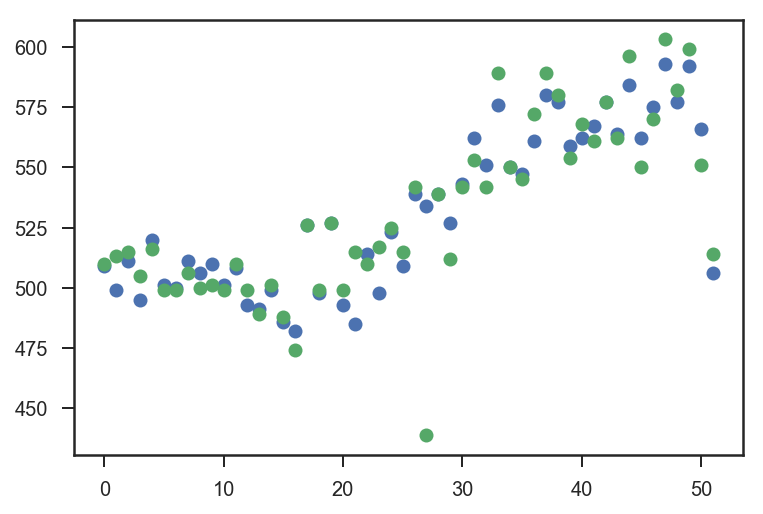

In [70]:
#original data
sat_scores_outliers =sat_scores.copy()
sat_scores_outliers= sat_scores_outliers.drop (['State','Rate','mean','median','verbal_math_difference','math vs verbal rank', 'verbal vs math rank'], axis =1)
display(plt.plot(sat_scores_outliers, 'o'))

('outlier value', Series([], Name: Verbal, dtype: float64), 0)
('outlier value', 0)
('outlier value', 27    439.0
Name: Math, dtype: float64, 1)
('outlier value', 1)


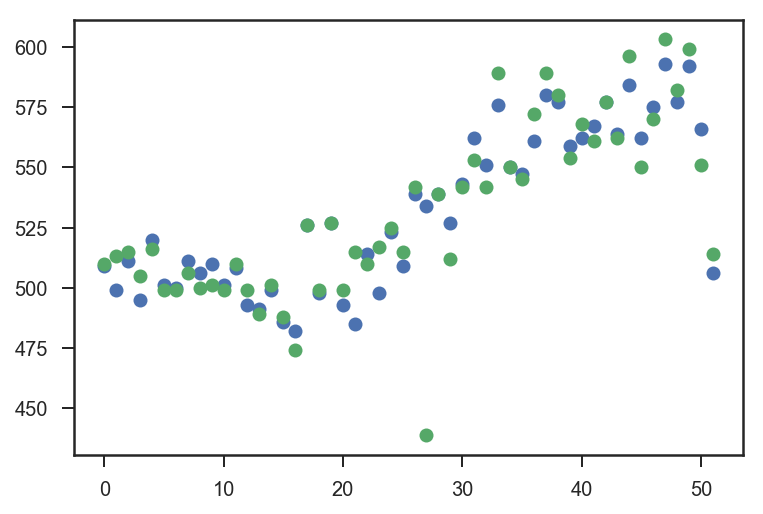

In [107]:
#68(1 std)   95(2 std)   99.7(3std)

#getting the outlier
#95%(2 std) get the outlier
sat_scores_outliers_calculation =sat_scores_outliers[((sat_scores_outliers - sat_scores_outliers.mean()) / sat_scores_outliers.std()).abs() > 2]

#print what is the outlier
for data in sat_scores_outliers_calculation:
    df = sat_scores_outliers_calculation[data]
    print('outlier value',df.dropna(), df.count())
    print('outlier value', df.count())
    
# Remove the data which is below the average - 2*std
sat_scores_clean = sat_scores_outliers[((sat_scores_outliers - sat_scores_outliers.mean()) / sat_scores_outliers.std()).abs() < 2]

display(plt.plot(sat_scores_outliers, 'o'))

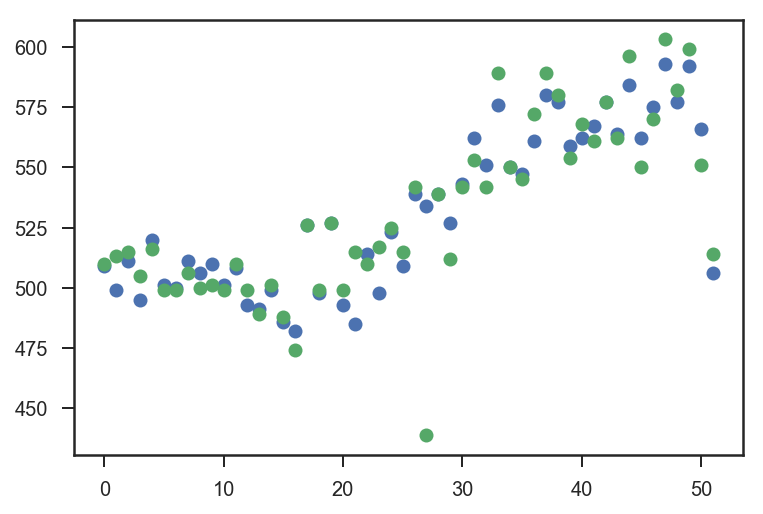

In [94]:
display(plt.plot(sat_scores_clean, 'o'))

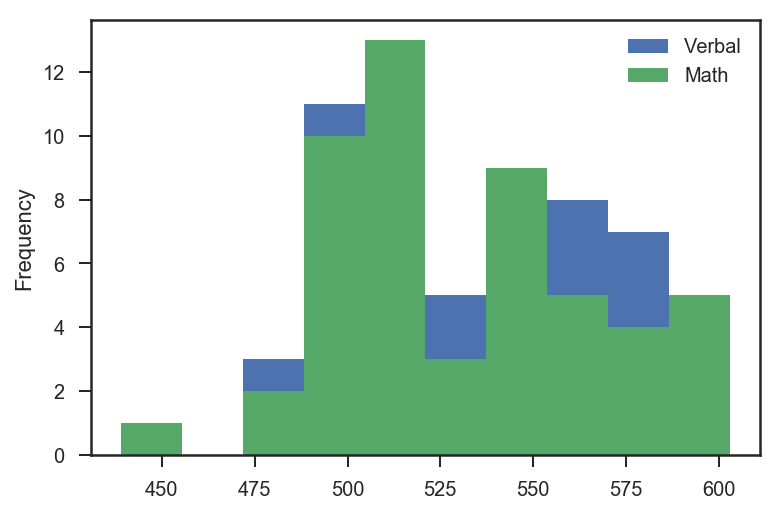

In [73]:
sat_scores_outliers.plot(kind= 'hist')

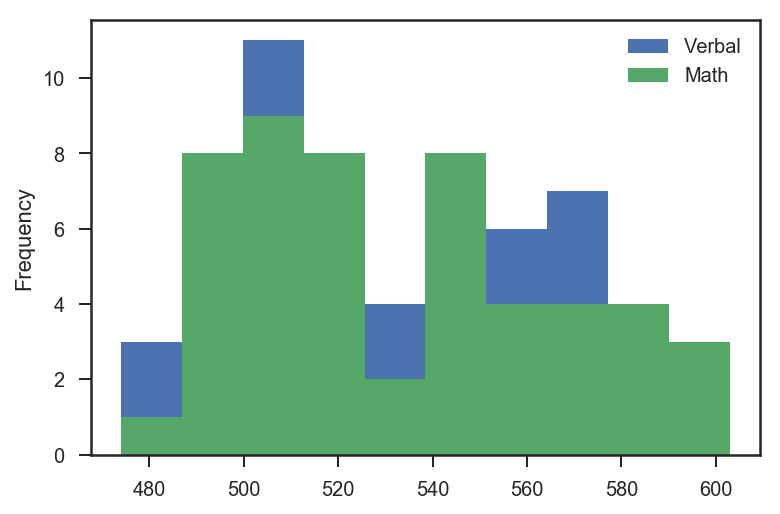

In [74]:
sat_scores_clean.plot(kind= 'hist')

In [75]:
print ('4.Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?')
display(sat_scores_outliers.describe())
print(sat_scores_outliers.median())
display(sat_scores_clean.describe())
print(sat_scores_clean.median())
print('')
print('answer: mean and std become lower in math because the outlier make the the data more spread, hence they gone now it become more narrow the spread')

4.Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?


,Verbal,Math
count,52.000000,52.000000
mean,532.019231,531.500000
std,33.236225,36.014975
min,482.000000,439.000000
25%,501.000000,504.000000
50%,526.500000,521.000000
75%,562.000000,555.750000
max,593.000000,603.000000


Verbal    526.5
Math      521.0
dtype: float64


,Verbal,Math
count,52.000000,51.000000
mean,532.019231,533.313725
std,33.236225,33.890111
min,482.000000,474.000000
25%,501.000000,505.500000
50%,526.500000,525.000000
75%,562.000000,557.500000
max,593.000000,603.000000


Verbal    526.5
Math      525.0
dtype: float64

answer: mean and std become lower in math because the outlier make the the data more spread, hence they gone now it become more narrow the spread


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [76]:
#1How does the spearman correlation compare to the pearson correlation?

print ('Pearson benchmarks linear relationship') 
print('Spearman benchmarks monotonic relationship (few infinities more general case, but for some power tradeoff).')
print('Monotonically increasing - as the x variable increases the y variable never decreases')
print('For instance if spearman is much greater than Pearson, the data is monotonically increasing but not linearly')
#http://www.statstutor.ac.uk/resources/uploaded/spearmans.pdf

print('')
print('the Spearman’s rank correlation is that it calculates a Pearson’s correlation (e.g. a parametric measure of correlation) using the rank values instead of the real values. Where the Pearson’s correlation is the calculation of the covariance (or expected difference of observations from the mean) between the two variables normalized by the variance or spread of both variables.')

Pearson benchmarks linear relationship
Spearman benchmarks monotonic relationship (few infinities more general case, but for some power tradeoff).
Monotonically increasing - as the x variable increases the y variable never decreases
For instance if spearman is much greater than Pearson, the data is monotonically increasing but not linearly

the Spearman’s rank correlation is that it calculates a Pearson’s correlation (e.g. a parametric measure of correlation) using the rank values instead of the real values. Where the Pearson’s correlation is the calculation of the covariance (or expected difference of observations from the mean) between the two variables normalized by the variance or spread of both variables.


In [77]:
#2the process of calculating the spearman rank correlation

In [191]:
print('_________________pearson calculation_________________')
#pearson calculation
from scipy.stats.stats import pearsonr 
print (pearsonr(sat_scores['Verbal'].values,sat_scores['Math'].values))

print('_______________spearman correlation___________________') 
#manual
# Create a function that takes in v(verbal) and m(math)
def spearmanscorrelation(x, y):
    
    # Calculate the rank of x's
    x_rank = pd.Series(x).rank()
    
    # Caclulate the ranking of the y's
    y_rank = pd.Series(y).rank()
    
    # Calculate Pearson's correlation coefficient on the ranked versions of the data
    return stats.pearsonr(x_rank, x_rank)

print('manual',spearmanscorrelation(sat_scores['Verbal'], sat_scores['Math']))


#spearman correlation
spearmanr =stats.spearmanr(sat_scores['Verbal'].values,sat_scores['Math'].values)
print(spearmanr)

print('')
print('The Spearman rank correlation uses ranks to correlate two variables with the Pearson Correlation. Ranks are the positions of values in sorted order. Items with equal values get a rank, which is the average of their positions. For instance, if we have two items of equal value assigned position 2 and 3, the rank is 2.5 for both items')

_________________pearson calculation_________________
(0.899870852544429, 1.192002673306768e-19)
_______________spearman correlation___________________
('manual', (1.0, 0.0))
SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)

The Spearman rank correlation uses ranks to correlate two variables with the Pearson Correlation. Ranks are the positions of values in sorted order. Items with equal values get a rank, which is the average of their positions. For instance, if we have two items of equal value assigned position 2 and 3, the rank is 2.5 for both items


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [237]:
sat_scores.reset_index()
sat_scores_new= sat_scores[ ['State','Rate','Verbal', 'Math']]

#set index
sat_scores_new.set_index('State', inplace=True)

#np.percentile(sat_scores_new,10)
#sat_scores_new['Rate'].describe(percentiles=np.linspace(0, 1, 20))

#give you the quantile
#sat_scores_new['Rate'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
#
#percenctile
Rate = sat_scores_new['Rate'].values
sat_scores_new['RatePerc'] = [stats.percentileofscore(Rate,Rate[k]) for k in range(0,len(Rate))]



#sort values
sat_scores_new.sort_values (by=['RatePerc'], ascending=False)
sat_scores_new

,Rate,Verbal,Math,RatePerc
State,,,,
CT,82,509,510,100.000000
NJ,81,499,513,98.076923
MA,79,511,515,96.153846
NY,77,495,505,94.230769
NH,72,520,516,92.307692
RI,71,501,499,89.423077
PA,71,500,499,89.423077
VT,69,511,506,85.576923
ME,69,506,500,85.576923


In [238]:
sat_scores_new.loc['CA']

Rate         51.000000
Verbal      498.000000
Math        517.000000
RatePerc     56.730769
Name: CA, dtype: float64

In [239]:
#location
sat_scores_new.iloc[23]

Rate         51.000000
Verbal      498.000000
Math        517.000000
RatePerc     56.730769
Name: CA, dtype: float64

In [240]:
#How is percentile related to the spearman rank correlation?
#using the percentile for to do the correlation

#Decreasing order of percentile is also decreasing order of rank in 
#the independent variable

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [241]:
print('1.Why might percentile scoring be useful for dealing with outliers?')
print('its show which value belong to which percentile which will tell you the outlier also')

#make new data set
drug_use_alcohol =drug_use[['age','n','alcohol-use','alcohol-frequency']]

#drug_use_alcohol.set_index('age', inplace =True)
drug_use_alcohol

1.Why might percentile scoring be useful for dealing with outliers?
its show which value belong to which percentile which will tell you the outlier also


,age,n,alcohol-use,alcohol-frequency
0,12,2798,3.9,3.0
1,13,2757,8.5,6.0
2,14,2792,18.1,5.0
3,15,2956,29.2,6.0
4,16,3058,40.1,10.0
5,17,3038,49.3,13.0
6,18,2469,58.7,24.0
7,19,2223,64.6,36.0
8,20,2271,69.7,48.0
9,21,2354,83.2,52.0


/Users/laurenciatitan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/laurenciatitan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,age,n,alcohol-use,alcohol-frequency,alcohol-use-percentile,frequency-use-percentile
0,12,2798,3.9,3.0,5.882353,5.882353
1,13,2757,8.5,6.0,11.764706,20.588235
2,14,2792,18.1,5.0,17.647059,11.764706
3,15,2956,29.2,6.0,23.529412,20.588235
4,16,3058,40.1,10.0,29.411765,29.411765
5,17,3038,49.3,13.0,38.235294,35.294118
6,18,2469,58.7,24.0,47.058824,41.176471
7,19,2223,64.6,36.0,52.941176,47.058824
8,20,2271,69.7,48.0,64.705882,52.941176
9,21,2354,83.2,52.0,94.117647,79.411765


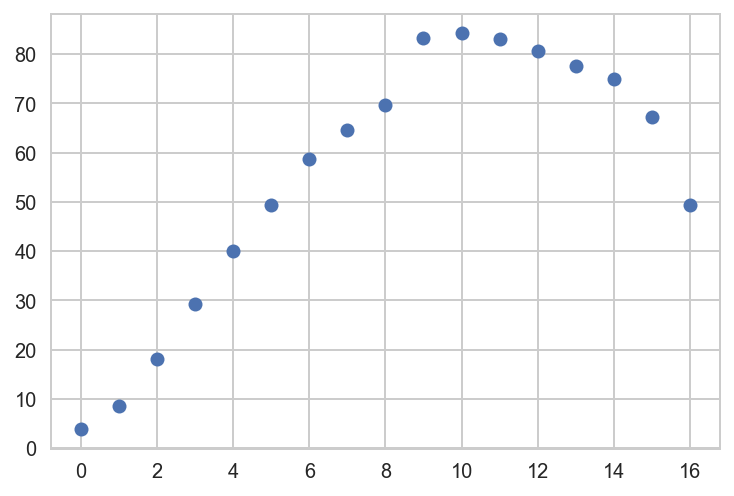

In [242]:
#make percentile
alcohol = drug_use_alcohol['alcohol-use'].values
alcohol_frequency=drug_use_alcohol['alcohol-frequency'].values
drug_use_alcohol['alcohol-use-percentile'] = [stats.percentileofscore(alcohol,alcohol[k]) for k in range(0,len(alcohol))]
drug_use_alcohol['frequency-use-percentile'] = [stats.percentileofscore(alcohol_frequency,alcohol_frequency[k]) for k in range(0,len(alcohol_frequency))]
display (drug_use_alcohol)
#plot by original
plt.plot(drug_use_alcohol['alcohol-use'] , 'o')



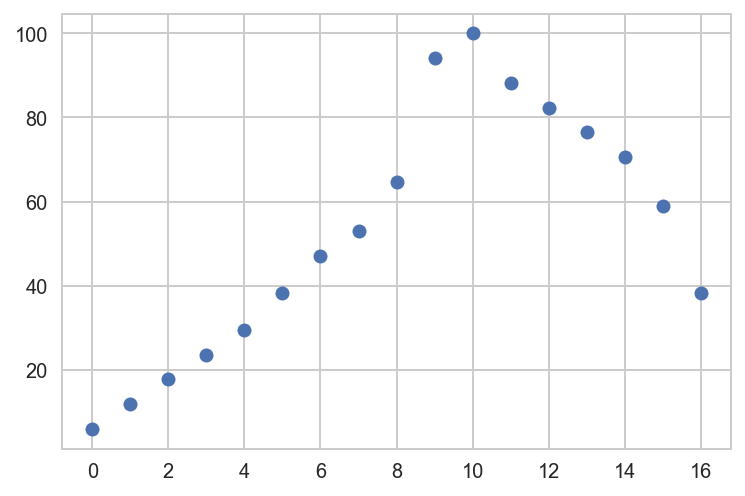

In [243]:
#plot by percentile
plt.plot(drug_use_alcohol['alcohol-use-percentile'] , 'o')

In [244]:
#percentile giving you location of your point value, show the outlier clear

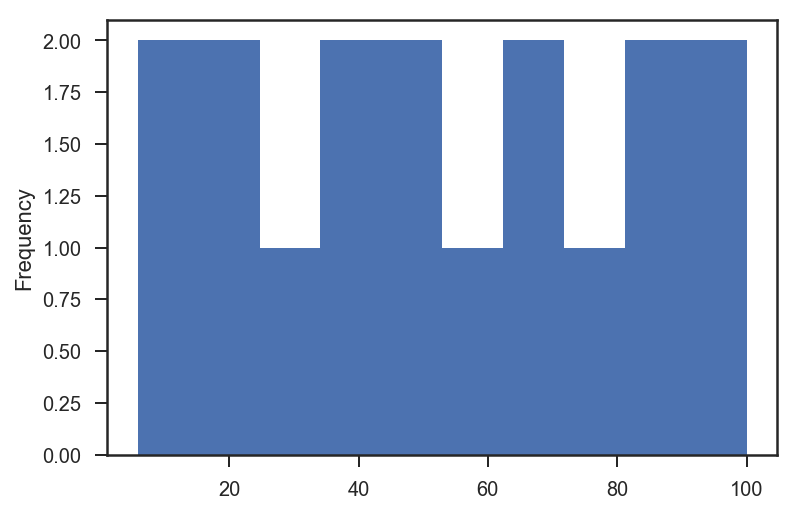

In [87]:
drug_use_alcohol['alcohol-use-percentile'].plot(kind= 'hist')

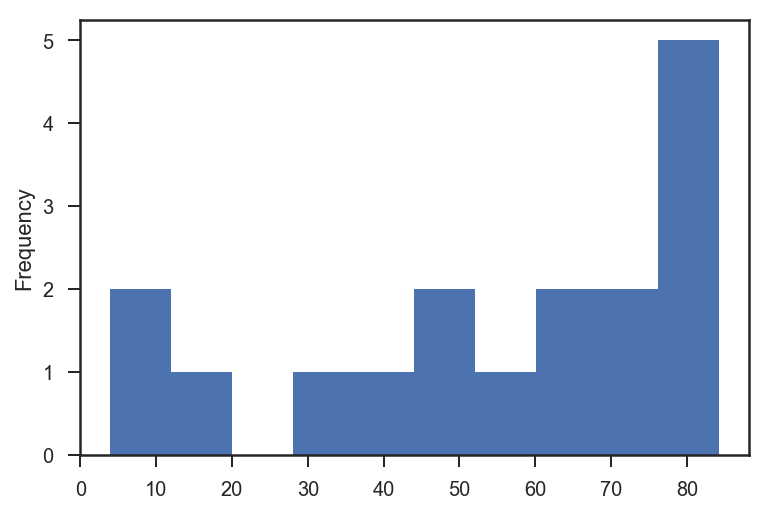

In [88]:
drug_use_alcohol['alcohol-use'].plot(kind= 'hist')

In [89]:
#Percentile describes drug usage place in order, Higher the value, Higher the rank, the higher will be your Percentile.